# Figures and Technical Validation

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to generate all figures and the technical validation analysis provided in the CAMELS-CH-Chem accompaining paper. 

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* 


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* 
## Observations
* None

# Import modules

In [1]:
import pandas as pd
import tqdm as tqdm
import os
import warnings
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import glob
from matplotlib.lines import Line2D
import matplotlib as mpl
from utils.plots import add_circular_legend, plot_variable_subplot, generate_legend_and_color_mapping

# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."

# Suppress all warnings
warnings.filterwarnings("ignore")

# Path to where the data are stored
path_data = r"C:\Users\nascimth\Documents\data\CAMELS_CH_Chem\data"

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
# Set the directory:
os.chdir(PATH)

# Import data

In [4]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
# Read the shapefile of Switzerland
countries = gpd.read_file(path_data+'\\shps\countries.shp')
countries

,fid,iso_a2,NAME,FIPS_10_,ISO_A3,WB_A2,WB_A3,geometry
0,3.0,DE,Germany,GM,DEU,DE,DEU,"MULTIPOLYGON (((6.79811 53.60444, 6.72242 53.5..."
1,144.0,FR,France,FR,FRA,FR,FRA,"MULTIPOLYGON (((55.70281 -20.94940, 55.74684 -..."
2,156.0,IT,Italy,IT,ITA,IT,ITA,"MULTIPOLYGON (((12.62176 35.50975, 12.61109 35..."
3,283.0,AT,Austria,AU,AUT,AT,AUT,"POLYGON ((9.58120 47.05687, 9.58825 47.06298, ..."
4,284.0,LI,Liechtenstein,LS,LIE,LI,LIE,"POLYGON ((9.53313 47.05553, 9.47702 47.06390, ..."
5,353.0,CH,Switzerland,SZ,CHE,CH,CHE,"POLYGON ((8.72897 46.10824, 8.67749 46.09579, ..."


In [6]:
# Read the shapefile of Switzerland
ch_shapefile = gpd.read_file(path_data+'\\shps\switzerland.shp')
ch_shapefile

,fid,iso_a2,NAME,FIPS_10_,ISO_A3,WB_A2,WB_A3,geometry
0,353.0,CH,Switzerland,SZ,CHE,CH,CHE,"POLYGON ((8.72897 46.10824, 8.67749 46.09579, ..."


In [7]:
CAMELS_CH_Chem_catchments = gpd.read_file("results\Dataset\shapefiles\camels_ch_del\camels_ch_chem_catchment_boundaries.shp")

CAMELS_CH_Chem_catchments

,gauge_id,sensor_id,nawaf_id,nawat_id,isot_id,chirp_id,gauge_name,water_body,gauge_east,gauge_nort,gauge_lon,gauge_lat,area,area_swiss,geometry
0,2009,2009.0,1837.0,1837.0,NIO04,NaN,Porte du Scex,Rhône,557660,133280,6.89,46.35,5239.4,99.994914,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
1,2011,2011.0,NaN,4070.0,None,NaN,Sion,Rhône,593770,118630,7.36,46.22,3372.4,100.000000,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
2,2016,2016.0,1833.0,1833.0,NIO02,NaN,Brugg,Aare,657000,259360,8.19,47.48,11681.3,100.000000,"POLYGON Z ((2655969.680 1259695.589 0.000, 265..."
3,2018,2018.0,1835.0,1339.0,None,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,3385.8,100.000000,"POLYGON Z ((2663723.380 1252919.068 0.000, 266..."
4,2019,2019.0,NaN,1852.0,NIO01,NaN,Brienzwiler,Aare,649930,177380,8.09,46.75,555.2,100.000000,"POLYGON Z ((2669196.412 1183579.510 0.000, 266..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2617,2617.0,NaN,NaN,None,NaN,Müstair,Rom,830800,168700,10.45,46.63,128.6,42.552175,"POLYGON Z ((2820942.826 1171469.984 0.000, 282..."
111,2623,2623.0,NaN,NaN,None,NaN,Oberwald,Rhone,669900,154075,8.35,46.53,93.3,100.000000,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
112,2634,2634.0,6169.0,1181.0,None,NaN,Emmen,Kleine Emme,663700,213630,8.28,47.07,478.3,100.000000,"POLYGON Z ((2653429.237 1216261.807 0.000, 265..."
113,2635,2635.0,NaN,NaN,None,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.77,47.11,8.9,100.000000,"POLYGON Z ((2701144.527 1218073.633 0.000, 270..."


In [8]:
CAMELS_CH_Chem_catchments = CAMELS_CH_Chem_catchments.to_crs("EPSG:4326")

In [9]:
countries = countries.to_crs("EPSG:4326")

In [10]:
# Network CAMELS_CH_Chem
network_camels_ch_chem = pd.read_csv(r"results\Dataset\gauges_metadata\camels_ch_chem_gauges_metadata.csv", encoding="utf-8")
#network_camels_ch_chem.set_index("basin_id", inplace=True)
network_camels_ch_chem

,gauge_id,sensor_id,nawaf_id,nawat_id,isot_id,chirp_id,gauge_name,water_body_name,gauge_easting,gauge_northing,...,gauge_northing_nawaf,area_nawaf,foen_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,foen_nawat_dist,q_nawat_corrector,remarks
0,2009,2009.0,1837.0,1837.0,NIO04,NaN,Porte du Scex,Rhône,557660,133280,...,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,1.000000,NaN
1,2011,2011.0,NaN,4070.0,NaN,NaN,Sion,Rhône,593770,118630,...,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,1.000005,NaN
2,2016,2016.0,1833.0,1833.0,NIO02,NaN,Brugg,Aare,657000,259360,...,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,0.999999,NaN
3,2018,2018.0,1835.0,1339.0,NaN,NaN,Mellingen,Reuss,662830,252580,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,1.010250,NaN
4,2019,2019.0,NaN,1852.0,NIO01,NaN,Brienzwiler,Aare,649930,177380,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,1.001097,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2617,2617.0,NaN,NaN,NaN,NaN,Müstair,Rom,830800,168700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,2623,2623.0,NaN,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,2634,2634.0,6169.0,1181.0,NaN,NaN,Emmen,Kleine Emme,663700,213630,...,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...
113,2635,2635.0,NaN,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Station moved in 2012?


## Figure 1

In [11]:
network_camels_ch_chem_gdf = network_camels_ch_chem.copy()
network_camels_ch_chem_gdf.set_index("gauge_id", inplace=True)
network_camels_ch_chem_gdf[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]

In [12]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_chemistry\timeseries\daily" 

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    df.set_index("date", inplace=True)
    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_df = pd.DataFrame(data, columns=['camels_id', 'count_bafu']).set_index('camels_id')

counts_datasets_df = pd.DataFrame(index=network_camels_ch_chem_gdf.index)

counts_datasets_df["count_bafu"] = counts_bafu_df["count_bafu"]
counts_datasets_df

  0%|          | 0/86 [00:00<?, ?it/s]

100%|██████████| 86/86 [00:00<00:00, 95.01it/s]


,count_bafu
gauge_id,
2009,4.0
2011,1.0
2016,4.0
2018,4.0
2019,1.0
...,...
2617,1.0
2623,1.0
2634,1.0


In [13]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_chemistry\interval_samples\nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_naduf"] = data_df["count"]

counts_datasets_df

100%|██████████| 24/24 [00:00<00:00, 42.53it/s]


,count_bafu,count_naduf
gauge_id,,
2009,4.0,35.0
2011,1.0,NaN
2016,4.0,32.0
2018,4.0,32.0
2019,1.0,NaN
...,...,...
2617,1.0,NaN
2623,1.0,NaN
2634,1.0,23.0


In [14]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_chemistry\interval_samples\nawa_trend"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_nawa"] = data_df["count"]

counts_datasets_df

100%|██████████| 76/76 [00:00<00:00, 108.15it/s]


,count_bafu,count_naduf,count_nawa
gauge_id,,,
2009,4.0,35.0,19.0
2011,1.0,NaN,14.0
2016,4.0,32.0,19.0
2018,4.0,32.0,21.0
2019,1.0,NaN,14.0
...,...,...,...
2617,1.0,NaN,NaN
2623,1.0,NaN,NaN
2634,1.0,23.0,13.0


In [15]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_isotopes\isot"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_isotopes_df = pd.DataFrame(index=network_camels_ch_chem_gdf.index)

counts_isotopes_df["count_isot"] = data_df["count"]

counts_isotopes_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]

counts_isotopes_df

100%|██████████| 9/9 [00:00<00:00, 80.23it/s]


,count_isot,lat,lon
gauge_id,,,
2009,2.0,46.35,6.89
2011,NaN,46.22,7.36
2016,2.0,47.48,8.19
2018,NaN,47.42,8.27
2019,2.0,46.75,8.09
...,...,...,...
2617,NaN,46.63,10.45
2623,NaN,46.53,8.35
2634,NaN,47.07,8.28


In [17]:
counts_datasets_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]
counts_datasets_df

,count_bafu,count_naduf,count_nawa,lat,lon
gauge_id,,,,,
2009,4.0,35.0,19.0,46.35,6.89
2011,1.0,NaN,14.0,46.22,7.36
2016,4.0,32.0,19.0,47.48,8.19
2018,4.0,32.0,21.0,47.42,8.27
2019,1.0,NaN,14.0,46.75,8.09
...,...,...,...,...,...
2617,1.0,NaN,NaN,46.63,10.45
2623,1.0,NaN,NaN,46.53,8.35
2634,1.0,23.0,13.0,47.07,8.28


<Axes: >

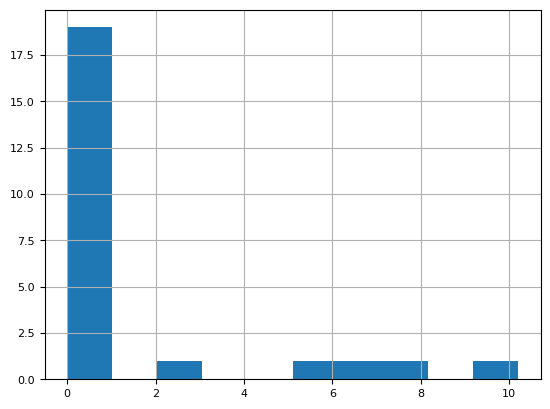

In [70]:
network_camels_ch_chem_gdf.foen_nawaf_dist.hist()

In [63]:
#Defining the colour categories and mapping lists
color_categories_temp_mean = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_ph_mean = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_EC_mean = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_o_mean = [(-np.inf, 10), (10.25, 10.5), (10.5, 10.75), (10.75, 11), (11, np.inf)]
color_categories_count_naduf = [(-np.inf, 20), (20, 25), (25, 30), (30, 35), (35, np.inf)]
color_categories_count_bafu = [(-np.inf, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_count_nawa = [(-np.inf, 14), (14, 16), (16, 18), (18, 20), (20, np.inf)]
color_categories_count_isot = [(-np.inf, 1.0), (1.0, np.inf)]
color_categories_temp_mean_naduf = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_temp_mean_nawa = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_EC_mean_naduf = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_EC_mean_nawa = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_ph_mean_naduf = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_ph_mean_nawa = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_bafu_nawa_distance = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
color_categories_bafu_naduf_distance = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]

# Color mapping list
color_mapping_list = {
    "temp_mean":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean, 0, 10, 1, 10, color_palette='custom'),
    "ph_mean": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean, 0, 2, 0.5, 10, color_palette='blues'),
    "EC_mean": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean, -2, 5, 1, 10),
    "o_mean": generate_legend_and_color_mapping("O [mg/l]", color_categories_o_mean, 0, 10, 0.5, 10, color_palette='vegetation'),
    "count_naduf": generate_legend_and_color_mapping("NAWA-Fracht [-]", color_categories_count_naduf, 0, 1, 0.2, 10, color_palette='blues'),
    "count_bafu": generate_legend_and_color_mapping("Sensors [-]", color_categories_count_bafu, 100, 300, 50, 10, color_palette='blues'),
    "count_nawa":  generate_legend_and_color_mapping("NAWA-Trend [-]", color_categories_count_nawa, 0, 2, 0.25, 10, color_palette='blues'),
    "count_isot":  generate_legend_and_color_mapping("ISOT [-]", color_categories_count_isot, 0, 20, 2, 10, color_palette='blues'),
    "temp_mean_naduf":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_naduf, 0, 100, 1, 10, color_palette='custom'),
    "temp_mean_nawa":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_nawa, 0, 100, 1, 10, color_palette='custom'),
    "EC_mean_naduf": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_naduf, -2, 5, 1, 10),
    "EC_mean_nawa": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_nawa, -2, 5, 1, 10),
    "ph_mean_nawa": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_nawa, 0, 2, 0.5, 10, color_palette='blues'),
    "ph_mean_naduf": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_naduf, 0, 2, 0.5, 10, color_palette='blues'),
    "foen_nawat_dist": generate_legend_and_color_mapping("Distance [km2]", color_categories_bafu_nawa_distance, 0, 2, 0.5, 10, color_palette='custom'),
    "foen_nawaf_dist": generate_legend_and_color_mapping("Distance [km2]", color_categories_bafu_naduf_distance, 0, 2, 0.5, 10, color_palette='custom'),
}


def plot_variable_subplot(ax, variable, estreams_attributes, color_mapping_list, gdf, total_bins=20):
    """
    Plot a variable on a subplot along with its legend and histogram, ensuring correct bin edges from color_mapping
    and equal-width bins.

    Parameters:
        ax (matplotlib Axes): Subplot axes.
        variable (str): Name of the variable.
        estreams_attributes (DataFrame): DataFrame containing attribute data.
        color_mapping_list (dict): Dictionary containing color mapping information.
        gdf (GeoDataFrame): GeoDataFrame for plotting shapefile.
        total_bins (int): Total number of bins for the histogram (ensuring equal width).

    Returns:
        None
    """
    # Extract color mapping information from the color mapping list
    legend_title = color_mapping_list[variable][0]
    color_categories = color_mapping_list[variable][1]
    legend_labels = color_mapping_list[variable][2]
    color_mapping = color_mapping_list[variable][3]

    # Determine the min and max values from the data
    data_min = estreams_attributes[variable].min()
    data_max = estreams_attributes[variable].max()

    # Create uniform bin edges
    hist_bins = np.linspace(data_min, data_max, total_bins + 1)

    # Set the background color to white
    ax.set_facecolor('white')

    # Plot the shapefile with white facecolor and black boundaries
    gdf.plot(ax=ax, facecolor='none', edgecolor='none', linewidth=0.2)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(47.5, 50.5)

    # Plot the data on the map
    plot_num_measurementsmap_subplot(plotsome=estreams_attributes, xcoords="lon", ycoords="lat", column_labels=variable,
                                     color_categories=color_categories, color_mapping=color_mapping, 
                                     legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax=ax, 
                                     set_map_limits=True, minx=4.5, miny=47.5, maxx=8, maxy=50.5, show_legend=False, 
                                     legend_outside=False, north_arrow=False, markersize_map=40)

    # Turn off both x-axis and y-axis
    ax.set_axis_off()

    # Call the function to add a circular legend
    #add_circular_legend(ax, color_mapping, legend_labels, legend_title="")

    # Adjust aspect ratio
    ax.set_aspect('equal')

    # Hide spines for the main plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


def plot_num_measurementsmap_subplot(ax, plotsome: pd.DataFrame, xcoords="lon", ycoords="lat", column_labels="num_yearly_complete",
                                     crsproj='epsg:4326', showcodes=False, markersize_map=3, north_arrow=True, 
                                     set_map_limits=False, minx=0, miny=0, maxx=1, maxy=1, color_categories=None, color_mapping=None,
                                     legend_title=None, legend_labels=None, legend_loc='upper left', show_legend = True, 
                                     legend_outside=True, legend_bbox_to_anchor=(0.5, 1)):  # Add legend_outside and legend_bbox_to_anchor parameters:
    """
    Plot data on a subplot with additional options.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot where the data will be plotted.
        plotsome (pd.DataFrame): The data to be plotted.
        xcoords (str): The name of the column containing x-coordinates.
        ycoords (str): The name of the column containing y-coordinates.
        column_labels (str): The name of the column containing data for coloring.
        crsproj (str): The coordinate reference system (CRS) for the data.
        showcodes (bool): Whether to show data labels.
        markersize_map (int): Size of the markers.
        north_arrow (bool): Whether to include a north arrow.
        set_map_limits (bool): Whether to set specific map limits.
        minx (float): Minimum x-axis limit.
        miny (float): Minimum y-axis limit.
        maxx (float): Maximum x-axis limit.
        maxy (float): Maximum y-axis limit.
        color_categories (list): List of color categories for data bins.
        color_mapping (dict): Mapping of color categories to colors.
        legend_title (str): Title for the legend.
        legend_labels (list): Labels for the legend items.
        legend_loc (str): Location of the legend.
        show_legend (bool): Whether to display the legend.
        legend_outside (bool): Whether to place the legend outside the plot.
        legend_bbox_to_anchor (tuple): Position of the legend (x, y).

    Returns:
        None
    """
    # Prepare the data for plotting
    crs = {'init': crsproj}
    geometry = plotsome.apply(lambda row: Point(row[xcoords], row[ycoords]), axis=1)
    geodata = gpd.GeoDataFrame(plotsome, crs=crs, geometry=geometry)
    geodatacond = geodata

    if color_categories is not None and color_mapping is not None:
        geodatacond['color_category'] = pd.cut(geodatacond[column_labels], bins=[c[0] for c in color_categories] + [np.inf], labels=[f'{c[0]}-{c[1]}' for c in color_categories])
    else:
        raise ValueError("Both color_categories and color_mapping must be provided.")

    # Plotting and legend:
    for category, group in geodatacond.groupby('color_category'):
        #group.plot(ax=ax, color=color_mapping[category], markersize=markersize_map, legend=False, label=category)
        group.plot(ax=ax, marker='o', color=color_mapping[category], markersize=markersize_map, legend=False, label=category, edgecolor='none')
    
    if showcodes == True:
        geodatacond["Code"] = geodatacond.index
        geodatacond.plot(column='Code', ax=ax)
        for x, y, label in zip(geodatacond.geometry.x, geodatacond.geometry.y, geodatacond.index):
            ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
        plt.rcParams.update({'font.size': 12})

    if set_map_limits == False:
        total_bounds = geodatacond.total_bounds
        minx, miny, maxx, maxy = total_bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)

    # Plot the legend
    if legend_labels is None:
        legend_labels = [f'{c[0]}-{c[1]}' for c in color_categories]
        
    if show_legend:
        if legend_outside:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=legend_bbox_to_anchor,
                               bbox_transform=ax.transAxes, frameon=False)  # Use bbox_transform to position the legend
        else:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc=legend_loc, frameon=False)
            
        if legend_outside:
            ax.add_artist(legend)
            
    # Plot the north arrow:
    if north_arrow == True:
        x, y, arrow_length = 0.975, 0.125, 0.1

        ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=18,
                    xycoords='axes fraction')
  
    # Set font family and size using rcParams
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 12  # You can adjust this value as needed
    
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def add_circular_legend(ax, color_mapping, legend_labels, legend_title):
    """
    Add a circular legend to the specified axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to which the legend will be added.
        color_mapping (dict): A dictionary mapping legend labels to colors.
        legend_labels (list): List of legend labels.
        legend_title (str): Title for the legend.

    Returns:
        None
    """
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=7) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position

In [19]:
counts_datasets_df[~counts_datasets_df.count_naduf.isna()]

,count_bafu,count_naduf,count_nawa,lat,lon
gauge_id,,,,,
2009,4.0,35.0,19.0,46.35,6.89
2016,4.0,32.0,19.0,47.48,8.19
2018,4.0,32.0,21.0,47.42,8.27
2044,4.0,34.0,21.0,47.60,8.68
2067,1.0,20.0,NaN,46.89,10.47
2068,4.0,25.0,19.0,46.16,8.91
2085,4.0,27.0,19.0,47.06,7.18
2091,1.0,0.0,NaN,47.56,7.80
2106,1.0,28.0,17.0,47.52,7.62


In [20]:
counts_datasets_df

,count_bafu,count_naduf,count_nawa,lat,lon
gauge_id,,,,,
2009,4.0,35.0,19.0,46.35,6.89
2011,1.0,NaN,14.0,46.22,7.36
2016,4.0,32.0,19.0,47.48,8.19
2018,4.0,32.0,21.0,47.42,8.27
2019,1.0,NaN,14.0,46.75,8.09
...,...,...,...,...,...
2617,1.0,NaN,NaN,46.63,10.45
2623,1.0,NaN,NaN,46.53,8.35
2634,1.0,23.0,13.0,47.07,8.28


In [56]:
counts_datasets_df = counts_datasets_df[~(counts_datasets_df.count_bafu == 0)]

In [72]:
counts_datasets_df

,count_bafu,count_naduf,count_nawa,count_isot,lat,lon
gauge_id,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89
2011,1.0,NaN,14.0,NaN,46.22,7.36
2016,4.0,32.0,19.0,2.0,47.48,8.19
2018,4.0,32.0,21.0,NaN,47.42,8.27
2019,1.0,NaN,14.0,2.0,46.75,8.09
...,...,...,...,...,...,...
2617,1.0,NaN,NaN,NaN,46.63,10.45
2623,1.0,NaN,NaN,NaN,46.53,8.35
2634,1.0,23.0,13.0,NaN,47.07,8.28


In [21]:
# Set global font to Sans-serif
import matplotlib
matplotlib.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 10})  # Set global font size

In [35]:
counts_bafu_df.drop(2403, inplace=True)

In [ ]:
# Initialize Earth Engine
#ee.Authenticate()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


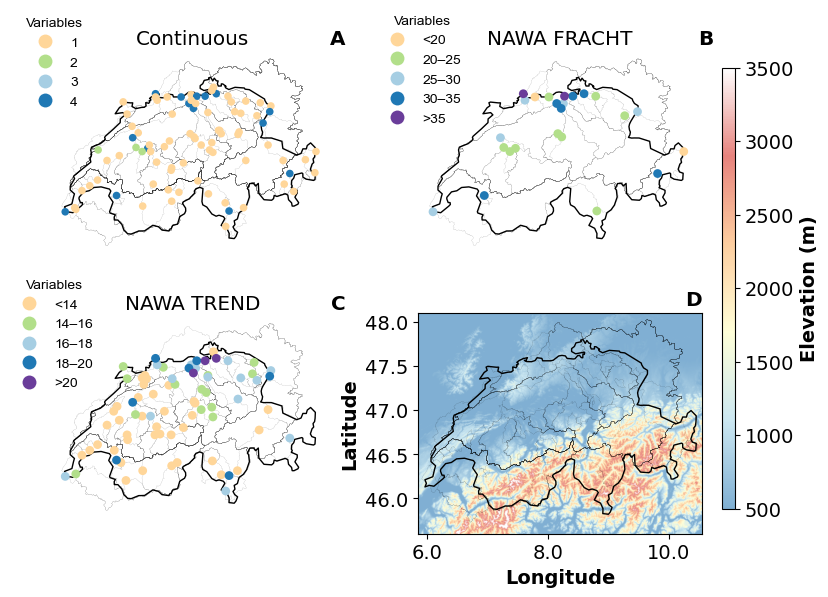

<Figure size 640x480 with 0 Axes>

In [42]:
# List of variables
variable_list = ["count_bafu", "count_naduf", "count_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows}
                        )
axs = axs.flatten()
text_subplots = ["87 stations", "24 stations", "76 stations", "9 stations"]
text2_subplots = ["Sensors [-]", "24 stations", "76 stations", "9 stations"]

for i, variable in enumerate(variable_list):
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=1)

    if variable == "count_bafu":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_bafu_df.index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)
        
        # Define labels and corresponding colors
        labels = ['1', '2', '4']
        colors = ['#FFD699', '#b2df8a', '#1f78b4']

        # Create a mapping from `count_bafu` values to colors
        color_map = {1: '#FFD699', 2: '#b2df8a', 4: '#1f78b4'}

        # Filter only valid values (existing in color_map)
        valid_mask = counts_datasets_df['count_bafu'].isin(color_map.keys())

        # Scatter plot with correct colors mapped from `count_bafu`
        axs[i].scatter(
            counts_datasets_df.loc[valid_mask, 'lon'], 
            counts_datasets_df.loc[valid_mask, 'lat'],
            c=counts_datasets_df.loc[valid_mask, 'count_bafu'].map(color_map),
            edgecolor='none', linewidth=0.5,
            marker='o', s=30, label="Streamflow gauges"
        )

        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
    elif variable == "count_naduf":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_datasets_df[~counts_datasets_df.count_naduf.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)
        plot_variable_subplot(axs[i], variable, counts_datasets_df, color_mapping_list, gdf)

    elif variable == "count_nawa":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_datasets_df[~counts_datasets_df.count_nawa.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)
        plot_variable_subplot(axs[i], variable, counts_datasets_df, color_mapping_list, gdf)

    elif variable == "count_isot":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_datasets_df[~counts_datasets_df.count_isot.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)
    
        axs[i].scatter(counts_datasets_df[counts_datasets_df.count_isot.notna()]['lon'], counts_datasets_df[counts_datasets_df.count_isot.notna()]['lat'], color='k', edgecolor='k',linewidth=1,
            marker='o', s=30, label = "Streamflow gauges")  # Adjust color, marker, and size as needed
        #ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
        axs[i].set_title("ISOT", loc="center", fontweight="normal")
    

    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='none', linewidth=0.2)
    
    axs[i].set_xlim(5.5, 11)
    axs[i].set_ylim(45.5, 48.1)
    

labels = ['1', '2', '3', '4']
colors = ['#FFD699', '#b2df8a', '#a6cee3', '#1f78b4']

legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=label,
            markerfacecolor=color, markersize=10, markeredgecolor='none')
        for label, color in zip(labels, colors)
    ]

# Adjust legend with custom font sizes
axs[0].legend(
    handles=legend_elements, title='Variables', title_fontsize=10,  # Change title font size
    loc='lower center', bbox_to_anchor=(0.05, 0.68), frameon=False, ncol=1,
    prop={'size': 10}  # Change legend label font size
)

    
axs[0].set_title("A", loc="right", fontweight="bold")
axs[0].set_title("Continuous", loc="center", fontweight="normal")

labels = ['<20', '20–25', '25–30', '30–35', '>35']
colors = ['#FFD699', '#b2df8a', '#a6cee3', '#1f78b4', '#6a3d9a']

legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=label,
            markerfacecolor=color, markersize=10, markeredgecolor='none')
        for label, color in zip(labels, colors)
    ]


# Adjust legend with custom font sizes
axs[1].legend(
    handles=legend_elements, title='Variables', title_fontsize=10,  # Change title font size
    loc='lower center', bbox_to_anchor=(0.05, 0.6), frameon=False, ncol=1,
    prop={'size': 10}  # Change legend label font size
)

axs[1].set_title("B", loc="right", fontweight="bold")
axs[1].set_title("NAWA FRACHT", loc="center", fontweight="normal"
                 )

labels = ['<14', '14–16', '16–18', '18–20', '>20']
colors = ['#FFD699', '#b2df8a', '#a6cee3', '#1f78b4', '#6a3d9a']

legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=label,
            markerfacecolor=color, markersize=10, markeredgecolor='none')
        for label, color in zip(labels, colors)
    ]

# Adjust legend with custom font sizes
axs[2].legend(
    handles=legend_elements, title='Variables', title_fontsize=10,  # Change title font size
    loc='lower center', bbox_to_anchor=(0.05, 0.6), frameon=False, ncol=1,
    prop={'size': 10}  # Change legend label font size
)

axs[2].set_title("C", loc="right", fontweight="bold")
axs[2].set_title("NAWA TREND", loc="center", fontweight="normal")

axs[3].set_title("D", loc="right", fontweight="bold")



##### Elevation
import ee
import geemap
import geopandas as gpd
import folium
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Initialize Earth Engine
ee.Initialize()

# Load the DEM dataset (SRTM 30m)
dem = ee.Image("USGS/SRTMGL1_003")

# Define a bounding box for Switzerland
switzerland_bbox = ee.Geometry.Rectangle([5.9559, 45.8179, 12, 48.8085])

topo_viz = {
    'min': 500,
    'max': 3500,
    'palette': ['#2c7bb6',  # Deep water (0-100m)
                '#abd9e9',  # Shallow water (100-500m)
                '#ffffbf',  # Lowlands (500-1500m)
                '#fdae61',  # Highlands (1500-2500m)
                '#d73027',  # Mountainous (2500-3500m)
                '#ffffff']  # Snow-capped peaks (3500m+)
}




# Generate a thumbnail image URL for Matplotlib
thumb_url = dem.visualize(**topo_viz).getThumbURL({
    'region': switzerland_bbox,
    'dimensions': '1024x1024',  # Adjust resolution as needed
    'format': 'png'
})

# Load Switzerland shapefile (if available)
# gdf = gpd.read_file("path/to/switzerland_shapefile.shp")  # Adjust path

# Set font properties
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelweight'] = 'bold'

# Set background color
axs[3].set_facecolor('white')

import urllib.request
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image from the URL
with urllib.request.urlopen(thumb_url) as url:
    img = Image.open(url)
    img_array = np.array(img)

axs[3].imshow(img_array, extent=[5.8, 10.6, 45.6, 48.1], alpha=0.6)  # Ensure correct alignment

# Overlay shapefile (if available)
ch_shapefile.plot(ax=axs[3], facecolor='none', edgecolor='black', linewidth=1)
CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_bafu_df.index].plot(ax=axs[3], facecolor='none', edgecolor='k', linewidth=0.05,  alpha=1)

# Set axis limits
axs[3].set_xlim(5.85, 10.55)
axs[3].set_ylim(45.6, 48.1)


# Customize x and y-axis ticks
axs[3].xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axs[3].yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axs[3].yaxis.set_major_locator(mticker.MultipleLocator(0.5))

# Add labels
axs[3].set_xlabel("Longitude")
axs[3].set_ylabel("Latitude")

# Add legend
axs[3].legend(loc='lower right', frameon=False)


# Define a custom colormap matching the DEM visualization
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import numpy as np

# Define a custom colormap based on the DEM visualization palette
cmap = mcolors.LinearSegmentedColormap.from_list("topo_cmap", topo_viz['palette'])

# Convert the colormap to an RGBA version
cmap_alpha = cmap(np.linspace(0, 1, 256))  # Get 256 discrete colors
cmap_alpha[:, -1] = 0.6  # Modify the alpha channel (last column)

# Create a new colormap with transparency
cmap = mcolors.ListedColormap(cmap_alpha)

norm = mcolors.Normalize(vmin=topo_viz['min'], vmax=topo_viz['max'])

# Create an axes for the colorbar
cbar_ax = fig.add_axes([0.91, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
from matplotlib.cm import ScalarMappable

cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)

# Set colorbar label
cbar.set_label("Elevation (m)")

plt.show()

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\figs\fig1.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

## Figure 2: Isotopes

In [16]:
CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[CAMELS_CH_Chem_catchments[~CAMELS_CH_Chem_catchments.chirp_id.isna()].chirp_id]

,sensor_id,nawaf_id,nawat_id,isot_id,chirp_id,gauge_name,water_body,gauge_east,gauge_nort,gauge_lon,gauge_lat,area,area_swiss,geometry
gauge_id,,,,,,,,,,,,,,
2112,2112.0,4409.0,4409.0,None,2112.0,Appenzell,Sitter,749040,244220,9.41,47.33,74.4,100.0,"POLYGON Z ((9.46187 47.34317 0.00000, 9.46172 ..."
2126,2126.0,NaN,NaN,None,2126.0,Wängi,Murg,714105,261720,8.95,47.50,80.1,100.0,"POLYGON Z ((9.06860 47.50456 0.00000, 9.06865 ..."
2179,2179.0,3717.0,1117.0,None,2179.0,"Thörishaus, Sensematt",Sense,593350,193020,7.35,46.89,351.2,100.0,"POLYGON Z ((7.38742 46.90501 0.00000, 7.38983 ..."
2202,NaN,NaN,1307.0,None,2202.0,Liestal,Ergolz,622270,259750,7.73,47.49,261.2,100.0,"POLYGON Z ((7.89621 47.49797 0.00000, 7.89622 ..."
2312,NaN,NaN,1402.0,None,2312.0,"Salmsach, Hungerbühl",Aach,744410,268400,9.36,47.55,47.4,100.0,"POLYGON Z ((9.26252 47.58596 0.00000, 9.26257 ..."
2327,2327.0,NaN,NaN,None,2327.0,"Davos, Kriegsmatte",Dischmabach,786220,183370,9.88,46.78,42.9,100.0,"POLYGON Z ((9.90532 46.77872 0.00000, 9.90541 ..."
2343,2343.0,NaN,NaN,None,2343.0,"Huttwil, Häberenbad",Langeten,629560,219135,7.83,47.12,59.9,100.0,"POLYGON Z ((7.83834 47.12310 0.00000, 7.83861 ..."
2356,2356.0,NaN,NaN,None,2356.0,"Cavergno, Pontit",Riale di Calneggia,684970,135960,8.54,46.37,23.9,100.0,"POLYGON Z ((8.48394 46.38225 0.00000, 8.48398 ..."
2369,2369.0,NaN,2119.0,None,2369.0,"Yvonand, La Mauguettaz",Mentue,545440,180875,6.72,46.78,105.3,100.0,"POLYGON Z ((6.73282 46.77887 0.00000, 6.73295 ..."


In [20]:
CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[CAMELS_CH_Chem_catchments[~CAMELS_CH_Chem_catchments.chirp_id.isna()].chirp_id].loc[[2604, 2609]]

,sensor_id,nawaf_id,nawat_id,isot_id,chirp_id,gauge_name,water_body,gauge_east,gauge_nort,gauge_lon,gauge_lat,area,area_swiss,geometry
gauge_id,,,,,,,,,,,,,,
2604,2604.0,NaN,NaN,None,2604.0,Biberbrugg,Biber,697240,223280,8.72,47.15,31.9,100.0,"POLYGON Z ((8.70374 47.16297 0.00000, 8.70487 ..."
2609,2609.0,NaN,NaN,None,2609.0,Einsiedeln,Alp,698640,223020,8.74,47.15,46.7,100.0,"POLYGON Z ((8.75744 47.15263 0.00000, 8.75702 ..."


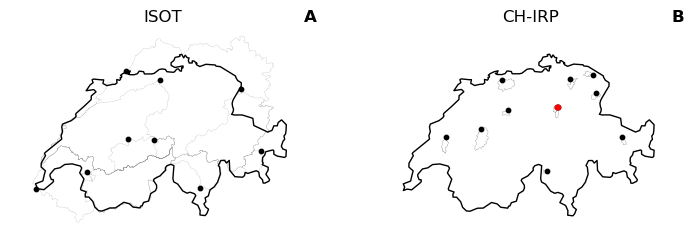

In [22]:
# Create a subplot grid
num_cols = 2
num_rows = 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows})

axs = axs.flatten()

ch_shapefile.plot(ax=axs[0], facecolor='none', edgecolor='black', linewidth=1)
ch_shapefile.plot(ax=axs[1], facecolor='none', edgecolor='black', linewidth=1)

CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_isotopes_df[~counts_isotopes_df.count_isot.isna()].index].plot(ax=axs[0], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)
    
axs[0].scatter(counts_isotopes_df[counts_isotopes_df.count_isot.notna()]['lon'], counts_isotopes_df[counts_isotopes_df.count_isot.notna()]['lat'], color='k', edgecolor='k',linewidth=1,
               marker='o', s=10, label = "Streamflow gauges")  # Adjust color, marker, and size as needed
        
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].set_xticks([])
axs[0].set_yticks([])

CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[CAMELS_CH_Chem_catchments[~CAMELS_CH_Chem_catchments.chirp_id.isna()].chirp_id].plot(ax=axs[1], facecolor='none', edgecolor='black', linewidth=0.1,  alpha=1)
    
axs[1].scatter(CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[CAMELS_CH_Chem_catchments[~CAMELS_CH_Chem_catchments.chirp_id.isna()].chirp_id]['gauge_lon'], CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[CAMELS_CH_Chem_catchments[~CAMELS_CH_Chem_catchments.chirp_id.isna()].chirp_id]['gauge_lat'], color='k', edgecolor='k',linewidth=1,
               marker='o', s=10, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

stations2604_2609 = CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[CAMELS_CH_Chem_catchments[~CAMELS_CH_Chem_catchments.chirp_id.isna()].chirp_id].loc[[2604, 2609]]

axs[1].scatter(stations2604_2609['gauge_lon'], stations2604_2609['gauge_lat'], color='r', edgecolor='r',linewidth=1,
               marker='o', s=10, label = "Streamflow gauges")  # Adjust color, marker, and size as needed
        

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])
axs[1].set_yticks([])


axs[0].set_title("A", loc="right", fontweight="bold")
axs[0].set_title("ISOT", loc="center", fontweight="normal")
    
axs[1].set_title("B", loc="right", fontweight="bold")
axs[1].set_title("CH-IRP", loc="center", fontweight="normal")

ch_shapefile.plot(ax=axs[0], facecolor='none', edgecolor='none', linewidth=0.2)
    
axs[0].set_xlim(5.5, 11)
axs[0].set_ylim(45.5, 48.1)

axs[1].set_xlim(5.5, 11)
axs[1].set_ylim(45.5, 48.1)

fig.savefig(r'results\figs\fig2_isotopes.png', dpi=300, bbox_inches='tight')

## Correlations

In [43]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_chemistry\interval_samples\nawa_fracht\\"

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 2  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    # Create a new dictionary for this row, with file_number and column counts
    row = {'camels_id': file_number}
    
    try:
        row["ec20lab_qmean"] = df.corr(method="spearman")["ec20_lab"]["q_mean_sensor"]
    except: 
        row["ec20lab_qmean"] = np.nan
    try:
        row["ec20lab_Cl"] = df.corr(method="spearman")["ec20_lab"]["Cl"]
    except: 
        row["ec20lab_Cl"] = np.nan

    try:
        row["doc_pHlab"] = df.corr(method="spearman")["doc"]["pH_lab"]
    except:
        row["doc_pHlab"] = np.nan

    #try:
    #    row["ec20lab_Ca"] = df.corr(method="spearman")["ec20_lab"]["Ca"]
    #except:
    #    row["ec20lab_Ca"] = np.nan

    try:
        row["ec25_online_Ca"] = df.corr(method="spearman")["ec25_sensor"]["Ca"]
    except:
        row["ec25_online_Ca"] = np.nan
    
    try:
        row["ec25_online_Cl"] = df.corr(method="spearman")["ec25_sensor"]["Cl"]
    except:
        row["ec25_online_Cl"] = np.nan

    try:
        row["alk_pH_lab"] = df.corr(method="spearman")["alk"]["pH_lab"]
    except:
        row["alk_pH_lab"] = np.nan
    
    try:
        row["NO3_N_ec20_lab"] = df.corr(method="spearman")["NO3_N"]["ec20_lab"]
    except:
        row["NO3_N_ec20_lab"] = np.nan

    # Append the row to the data list
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
mean_naduf_df = pd.DataFrame(data).set_index('camels_id')
mean_naduf_df

100%|██████████| 24/24 [00:04<00:00,  5.41it/s]


,ec20lab_qmean,ec20lab_Cl,doc_pHlab,ec25_online_Ca,ec25_online_Cl,alk_pH_lab,NO3_N_ec20_lab
camels_id,,,,,,,
2009,-0.806372,0.824856,0.122699,0.935519,0.852676,0.116772,0.850621
2016,-0.409356,0.880773,0.001689,0.879006,0.869721,0.080938,0.839492
2018,-0.603893,0.786124,-0.271006,0.911289,0.808155,0.049636,0.765142
2044,-0.512742,0.761412,-0.119479,0.814056,0.731279,0.202812,0.809732
2067,-0.907107,0.672617,0.028608,NaN,NaN,0.377896,0.538269
2068,-0.927704,0.624111,-0.089602,0.950837,0.704828,0.103764,0.537536
2085,-0.617080,0.892432,0.115697,0.964745,0.894505,0.144770,0.928427
2091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,-0.316912,0.519384,0.345828,NaN,NaN,0.323273,0.479982


In [44]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_chemistry\interval_samples\nawa_trend\\"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 1  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file to gather data and align columns
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin')
    
    # Filter out the columns starting from the specified index
    filtered_df = df.iloc[:, start_column_index:]
    
    # Here we take out the > or < before converting to a numeric value:
    filtered_df = filtered_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    filtered_df = filtered_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

    # Create a new dictionary for this row, with file_number and column counts
    row = {'camels_id': file_number}
    
    # Ensure sufficient data points before computing correlation
    valid_data = filtered_df[["ec25_lab", "q_mean_sensor"]].dropna()
    if len(valid_data) >= 2:
        row["ec25lab_qmean"] = filtered_df.corr(method="spearman")["ec25_lab"]["q_mean_sensor"]
    else:
        row["ec25lab_qmean"] = np.nan  # Assign NaN if there are fewer than 365 data points
    
    # Ensure sufficient data points before computing correlation
    valid_data = filtered_df[["ec25_lab", "Cl"]].dropna()
    if len(valid_data) >= 2:
        row["ec25lab_Cl"] = filtered_df.corr(method="spearman")["ec25_lab"]["Cl"]
    else:
        row["ec25lab_Cl"] = np.nan  # Assign NaN if there are fewer than 365 data points

    # Ensure sufficient data points before computing correlation
    valid_data = filtered_df[["ec25_lab", "NO3_N"]].dropna()
    if len(valid_data) >= 2:
        row["ec25lab_NO3_N"] = filtered_df.corr(method="spearman")["NO3_N"]["ec25_lab"]
    else:
        row["ec25lab_NO3_N"] = np.nan  # Assign NaN if there are fewer than 365 data points



    # Append the row to the data list
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
mean_nawa_df = pd.DataFrame(data).set_index('camels_id')
mean_nawa_df

100%|██████████| 76/76 [00:01<00:00, 56.38it/s]


,ec25lab_qmean,ec25lab_Cl,ec25lab_NO3_N
camels_id,,,
2009,-0.829064,0.890144,0.937474
2011,-0.786270,0.799816,0.710866
2016,-0.241788,0.873495,0.922982
2018,-0.362544,0.633479,0.659080
2019,-0.747692,0.875911,0.910602
...,...,...,...
2493,-0.171018,0.660575,0.746614
2610,0.107303,-0.010818,0.074905
2613,-0.392948,0.783752,0.848081


In [48]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_chemistry\\timeseries\daily\\"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file to gather data and align columns
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin', index_col=0)
    df.index = pd.to_datetime(df.index)
    df = df.loc["1980":, :]
    
    # Filter out the columns starting from the specified index
    filtered_df = df.iloc[:, :]
    
    # Here we take out the > or < before converting to a numeric value:
    filtered_df = filtered_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    filtered_df = filtered_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

    # Create a new dictionary for this row, with file_number and column counts
    row = {'camels_id': file_number}
    
    # Ensure sufficient data points before computing correlation
    valid_data = filtered_df[["temp_sensor", "O2C_sensor"]].dropna()
    if len(valid_data) >= 365:
        row["temp_o"] = valid_data.corr(method="spearman")["temp_sensor"]["O2C_sensor"]
    else:
        row["temp_o"] = np.nan  # Assign NaN if there are fewer than 365 data points
    
    # Ensure sufficient data points before computing correlation
    valid_data = filtered_df[["temp_sensor", "ec_sensor"]].dropna()
    if len(valid_data) >= 365:
        row["temp_EC"] = valid_data.corr(method="spearman")["temp_sensor"]["ec_sensor"]
    else:
        row["temp_EC"] = np.nan  # Assign NaN if there are fewer than 365 data points

    # Append the row to the data list
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
mean_sensors_df = pd.DataFrame(data).set_index('camels_id')
mean_sensors_df

100%|██████████| 85/85 [00:04<00:00, 20.29it/s]


,temp_o,temp_EC
camels_id,,
2009,-0.804012,-0.447153
2011,NaN,NaN
2016,-0.883332,-0.850180
2018,-0.910225,-0.823388
2019,NaN,NaN
...,...,...
2615,NaN,NaN
2617,NaN,NaN
2623,NaN,NaN


In [49]:
mean_naduf_df[mean_naduf_df.ec20lab_qmean>0]

,ec20lab_qmean,ec20lab_Cl,doc_pHlab,ec25_online_Ca,ec25_online_Cl,alk_pH_lab,NO3_N_ec20_lab
camels_id,,,,,,,
2608,0.035415,0.260457,0.144118,NaN,NaN,0.329693,0.153513


In [50]:
mean_nawa_df[mean_nawa_df.ec25lab_qmean>0]

,ec25lab_qmean,ec25lab_Cl,ec25lab_NO3_N
camels_id,,,
2029,0.025963,0.901464,0.956503
2099,0.131593,0.542035,0.799064
2102,0.082974,0.313214,0.456319
2210,0.325478,-0.055601,0.525827
2478,0.043625,0.099033,0.063335
2610,0.107303,-0.010818,0.074905
2640,0.277929,-0.005308,0.241666


In [51]:
mean_naduf_df

,ec20lab_qmean,ec20lab_Cl,doc_pHlab,ec25_online_Ca,ec25_online_Cl,alk_pH_lab,NO3_N_ec20_lab
camels_id,,,,,,,
2009,-0.806372,0.824856,0.122699,0.935519,0.852676,0.116772,0.850621
2016,-0.409356,0.880773,0.001689,0.879006,0.869721,0.080938,0.839492
2018,-0.603893,0.786124,-0.271006,0.911289,0.808155,0.049636,0.765142
2044,-0.512742,0.761412,-0.119479,0.814056,0.731279,0.202812,0.809732
2067,-0.907107,0.672617,0.028608,NaN,NaN,0.377896,0.538269
2068,-0.927704,0.624111,-0.089602,0.950837,0.704828,0.103764,0.537536
2085,-0.617080,0.892432,0.115697,0.964745,0.894505,0.144770,0.928427
2091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,-0.316912,0.519384,0.345828,NaN,NaN,0.323273,0.479982


In [52]:
mean_nawa_df["ec25lab_qmean"]

camels_id
2009   -0.829064
2011   -0.786270
2016   -0.241788
2018   -0.362544
2019   -0.747692
          ...   
2493   -0.171018
2610    0.107303
2613   -0.392948
2634   -0.688316
2640    0.277929
Name: ec25lab_qmean, Length: 76, dtype: float64

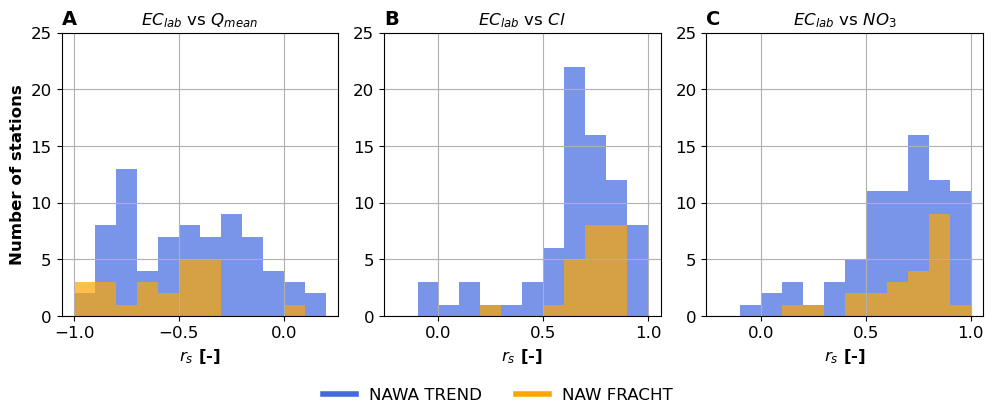

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Set global font to Sans-serif
matplotlib.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 8})  # Set global font size

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Define dataset colors
colors = {"NADUF": "orange", "NAWA": "royalblue", "Sensors": "gray"}  # Gray as placeholder

# Left subplot: Histogram (EC_lab vs Q_mean)
bin_edges = [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0.0, 0.1, 0.2]
sns.histplot(mean_nawa_df["ec25lab_qmean"], bins=bin_edges, kde=False, ax=axs[0], color=colors["NAWA"], alpha=0.7, linewidth=0)
sns.histplot(mean_naduf_df["ec20lab_qmean"], bins=bin_edges, kde=False, ax=axs[0], color=colors["NADUF"], alpha=0.7, linewidth=0)

axs[0].set_ylabel("Number of stations", fontsize=12)
axs[0].set_xlabel(r'$r_s$ [-]', fontsize=12)
axs[0].set_title('A', loc="left", fontsize=14, fontweight="bold")

axs[0].set_title('$EC_{lab}$ vs $Q_{mean}$', loc="center", fontsize=12)
axs[0].tick_params(axis="x", labelsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(True)

# Middle subplot: Histogram (EC_lab vs Cl)
bin_edges = [-0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
sns.histplot(mean_nawa_df["ec25lab_Cl"], bins=bin_edges, kde=False, ax=axs[1], color=colors["NAWA"], alpha=0.7, linewidth=0)
sns.histplot(mean_naduf_df["ec20lab_Cl"], bins=bin_edges, kde=False, ax=axs[1], color=colors["NADUF"], alpha=0.7, linewidth=0)

axs[1].set_ylabel("")
axs[1].set_xlabel('$r_s$ [-]', fontsize=12)
axs[1].set_title('B', loc="left", fontsize=14, fontweight="bold")

axs[1].set_title('$EC_{lab}$ vs $Cl$', loc="center", fontsize=12)
axs[1].tick_params(axis="x", labelsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(True)

# Right subplot: Histogram (EC_lab vs NO3_N)
sns.histplot(mean_nawa_df["ec25lab_NO3_N"], bins=bin_edges, kde=False, ax=axs[2], color=colors["NAWA"], alpha=0.7, linewidth=0)
sns.histplot(mean_naduf_df["NO3_N_ec20_lab"], bins=bin_edges, kde=False, ax=axs[2], color=colors["NADUF"], alpha=0.7, linewidth=0)

axs[2].set_ylabel("")
axs[2].set_xlabel('$r_s$ [-]', fontsize=12)
axs[2].set_title('C', loc="left", fontsize=14, fontweight="bold")

axs[2].set_title('$EC_{lab}$ vs $NO_3$', loc="center", fontsize=12)
axs[2].tick_params(axis="x", labelsize=12)
axs[2].tick_params(axis="y", labelsize=12)
axs[2].grid(True)

# Set same y-limits for all subplots
for ax in axs:
    ax.set_ylim(0, 25)

# Create a legend outside the plot at the bottom
handles = [
    plt.Line2D([0], [0], color=colors["NAWA"], lw=4, label="NAWA TREND"),
    plt.Line2D([0], [0], color=colors["NADUF"], lw=4, label="NAW FRACHT"),
    #plt.Line2D([0], [0], color=colors["Sensors"], lw=4, label="Sensors")  # Placeholder
]
fig.legend(handles=handles, loc="lower center", ncol=3, frameon=False, fontsize=12, bbox_to_anchor=(0.5, -0.05))

# Adjust layout to fit legend
fig.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space at bottom for legend
fig.savefig(r'results\figs\fig_hist_EC_q_cl_no3.png', dpi=300, bbox_inches='tight')

plt.show()

In [54]:
# Define the path where the CSV files are located
path = r"results\\Dataset\\stream_water_chemistry\\timeseries\\daily\\"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 1  # Adjust this based on where you want to start counting

# Initialize an empty list to store the data
data = []

file = r'results\\Dataset\\stream_water_chemistry\\timeseries\\daily\\CAMELS_CH_Chem_daily_2018.csv'
# Extract the number from the file name (assuming it's part of the file name)
file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
# Read the CSV file
df = pd.read_csv(file, encoding='latin', index_col=0)
df.index = pd.to_datetime(df.index)

# Filter out the columns starting from the specified index
filtered_df = df.iloc[:, :]
    
# Here we take out the > or < before converting to a numeric value:
filtered_df = filtered_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
filtered_df = filtered_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

# There are some non-numeric things in the columns, instead of NaNs
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

In [55]:
mean_sensors_df.temp_o.isna().sum()

70

In [34]:
mean_sensors_df[mean_sensors_df.temp_o<-0.7].count()

temp_o     15
temp_EC    15
dtype: int64

In [38]:
mean_sensors_df[mean_sensors_df.temp_o<-0.7].count()/(86-mean_sensors_df.temp_o.isna().sum())

temp_o     0.9375
temp_EC    0.9375
dtype: float64

In [30]:
filtered_df

,NH4_N,Cl,q_max_kanton,q_min_kanton,q_mean_kanton,q_mean_sensor,doc,ec25_lab,ec25_sensor,tp,...,NO2_N,drp,pH_lab,pH_sensor,O2_lab,O2_sensor,O2S_sensor,turbidity_sensor,temp_lab,temp_sensor
0,0.008,7.70,NaN,NaN,2.64,2.6724,1.30,435.0,NaN,0.063,...,0.001,0.011,8.2,NaN,11.7,NaN,NaN,NaN,5.2,NaN
1,0.008,10.00,NaN,NaN,2.06,2.1433,1.50,478.0,NaN,0.010,...,0.002,0.007,8.4,NaN,12.0,NaN,NaN,NaN,6.2,NaN
2,0.012,7.20,NaN,NaN,2.19,2.2448,1.60,459.0,NaN,0.011,...,0.002,0.007,8.3,NaN,13.1,NaN,NaN,NaN,6.2,NaN
3,0.011,7.90,NaN,NaN,1.02,1.1322,1.20,446.0,NaN,0.010,...,0.009,0.004,8.0,NaN,11.4,NaN,NaN,NaN,11.0,NaN
4,0.023,8.30,NaN,NaN,0.87,0.9611,1.20,455.0,NaN,0.023,...,0.014,0.012,8.3,NaN,10.8,NaN,NaN,NaN,12.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.009,6.10,NaN,NaN,1.20,0.5831,2.70,385.0,NaN,0.020,...,0.012,0.007,8.2,NaN,9.9,NaN,NaN,NaN,17.2,NaN
116,0.011,7.86,NaN,NaN,1.50,0.6225,1.17,426.0,NaN,0.020,...,0.022,0.008,8.0,NaN,9.9,NaN,NaN,NaN,11.2,NaN
117,0.009,6.82,NaN,NaN,1.60,0.9841,2.47,452.0,NaN,0.020,...,0.011,0.010,8.1,NaN,11.4,NaN,NaN,NaN,10.4,NaN
118,0.004,6.33,NaN,NaN,1.50,0.8211,1.18,457.0,NaN,0.020,...,0.010,0.006,8.0,NaN,12.4,NaN,NaN,NaN,4.4,NaN


In [32]:
filtered_df

,temp_sensor,pH_sensor,ec_sensor,O2C_sensor
date,,,,
1981-01-01,3.60,7.79,257.5,11.53
1981-01-02,3.80,7.87,254.2,11.65
1981-01-03,4.20,7.87,263.3,11.38
1981-01-04,4.50,7.81,273.1,10.95
1981-01-05,3.30,7.84,252.1,11.38
...,...,...,...,...
2020-12-27,5.58,8.32,300.2,12.08
2020-12-28,5.73,8.29,296.4,11.79
2020-12-29,5.94,8.29,297.3,11.81


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


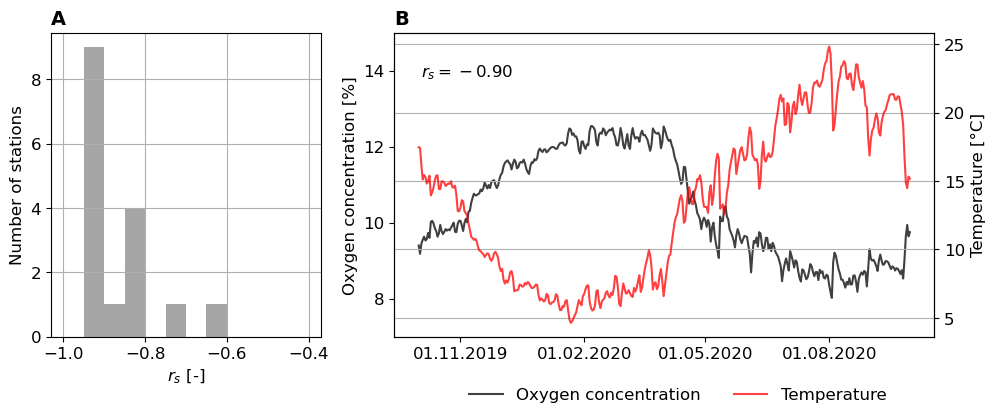

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib

# Set global font to Sans-serif
matplotlib.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 8})  # Set global font size

# Create figure with two subplots (left: histogram, right: time series with twin axes)
fig, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 2]})

# Left subplot: Histogram
bin_edges = [-1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.40]
sns.histplot(mean_sensors_df["temp_o"], bins=bin_edges, kde=False, ax=axs[0], color='gray', alpha=0.7, linewidth=0)

axs[0].set_ylabel("Number of stations", fontsize=12)
axs[0].set_xlabel(r'$r_s$ [-]', fontsize=12)
axs[0].legend(frameon=False)
axs[0].set_title('A', loc="left", fontsize=14, fontweight="bold")
axs[0].tick_params(axis="x", labelsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(True)

# Right subplot: Time series with twin axes
ax1 = axs[1]  # Primary axis for Oxygen
ax2 = ax1.twinx()  # Secondary axis for Temperature

# Plot the first variable (oxygen concentration) on the primary y-axis
ax1.set_ylabel("Oxygen concentration [%]", fontsize=12)
temp_line, = ax1.plot(filtered_df.loc["2019-10-01":"2020-09-30"].index, filtered_df.loc["2019-10-01":"2020-09-30", "O2C_sensor"], color="k", label="Oxygen concentration", alpha=0.75)
ax1.tick_params(axis="y", labelsize=12)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))  # Limit to 5 ticks

# Plot the second variable (temperature) on the secondary y-axis
ax2.set_ylabel("Temperature [°C]", fontsize=12)
oxygen_line, = ax2.plot(filtered_df.loc["2019-10-01":"2020-09-30"].index, filtered_df.loc["2019-10-01":"2020-09-30", "temp_sensor"], color="red", label="Temperature", alpha=0.75)
ax2.tick_params(axis="y", labelsize=12)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))  # Limit to 5 ticks
ax1.tick_params(axis="x", labelsize=12)

# Set y-axis limit
ax1.set_ylim(7, 15)

# Add title
axs[1].set_title('B', loc="left", fontsize=14, fontweight="bold")

# Format x-axis labels for subplot 2
date_format = mdates.DateFormatter('%d.%m.%Y')
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Add text annotation for r_s = 0.90
axs[1].text(0.05, 0.9, r'$r_s = -0.90$', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')

# Add a combined legend at the bottom center
fig.legend(handles=[temp_line, oxygen_line], loc="lower center", bbox_to_anchor=(0.68, -0.05), fontsize=12, frameon=False, ncol=2)

# Adjust layout and show plots
fig.tight_layout()
plt.grid(True)

fig.savefig(r'results\figs\fig_hist_plot_temp_o.png', dpi=300, bbox_inches='tight')

plt.show()

## Now we can process some means

In [14]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_chemistry\timeseries\daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))


    # Count the number of non-null values in each column
    temp_mean = df['temp_sensor'].mean()
    ec_mean = df['ec_sensor'].mean()
    o_mean = df['O2C_sensor'].mean()
    ph_mean = df['pH_sensor'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_bafu_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean', 'ph_mean', 'EC_mean', 'o_mean']).set_index('camels_id')

mean_bafu_daily_df

100%|██████████| 85/85 [00:09<00:00,  8.80it/s]


,temp_mean,ph_mean,EC_mean,o_mean
camels_id,,,,
2009,7.320306,8.091369,290.656359,11.438225
2011,6.993472,NaN,NaN,NaN
2016,12.009385,8.023153,377.401069,10.366171
2018,11.870272,8.087549,262.998814,10.394436
2019,5.994370,NaN,NaN,NaN
...,...,...,...,...
2615,12.578869,NaN,NaN,NaN
2617,5.718993,NaN,NaN,NaN
2623,3.796978,NaN,NaN,NaN


In [16]:
mean_bafu_daily_df.corr()

,temp_mean,ph_mean,EC_mean,o_mean
temp_mean,1.000000,0.272047,0.266416,-0.364036
ph_mean,0.272047,1.000000,0.286325,0.088487
EC_mean,0.266416,0.286325,1.000000,-0.384880
o_mean,-0.364036,0.088487,-0.384880,1.000000


In [17]:
df.columns

Index(['temp_sensor', 'pH_sensor', 'ec_sensor', 'O2C_sensor'], dtype='object')

In [56]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_chemistry\interval_samples\nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date_end'] = pd.to_datetime(df['date_end'])
    df.set_index('date_end', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))

    # Count the number of non-null values in each column
    temp_mean = df['Cl'].mean()
    ec_mean = df['alk'].mean()
    o_mean = df['NO3_N'].mean()
    ph_mean = df['SO4'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_naduf_daily_df = pd.DataFrame(data, columns=['camels_id', 'Cl', 'alk', 'NO3_N', 'SO4']).set_index('camels_id')

mean_naduf_daily_df

100%|██████████| 24/24 [00:11<00:00,  2.09it/s]


,Cl,alk,NO3_N,SO4
camels_id,,,,
2009,9.723020,54.432048,1.450499,0.598524
2016,9.842702,25.891693,3.036009,1.777213
2018,4.504234,14.273151,2.273987,0.994116
2044,15.365532,11.769007,4.079238,2.633645
2067,1.152500,52.067829,1.496118,0.261012
2068,3.267387,65.840000,1.030623,0.891707
2085,5.966626,31.728874,2.637166,1.207767
2091,NaN,NaN,NaN,NaN
2106,10.716866,19.618997,4.135448,2.763150


In [94]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa_trend"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))
    
    # Count the number of non-null values in each column
    temp_mean = df['temp_online'].mean()
    ec_mean = df['ec25_lab'].mean()
    o_mean = df['O2_lab'].mean()
    ph_mean = df['pH_online'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_nawa_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']).set_index('camels_id')

mean_nawa_daily_df

  0%|          | 0/76 [00:00<?, ?it/s]

100%|██████████| 76/76 [00:16<00:00,  4.56it/s]


,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
camels_id,,,,
2009,7.760127,8.162552,337.622414,11.424576
2011,6.948118,NaN,293.205882,11.046930
2016,12.454387,8.061395,379.857143,10.501770
2018,12.539650,8.250862,267.475000,10.458333
2019,6.365422,NaN,114.977108,11.823494
...,...,...,...,...
2493,9.505870,NaN,440.192063,NaN
2610,NaN,NaN,412.560345,10.828017
2613,13.023550,8.059933,354.028846,10.674038


In [95]:
mean_nawa_daily_df.corr()

,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
temp_mean_nawa,1.000000,0.359468,0.372695,-0.684473
ph_mean_nawa,0.359468,1.000000,0.481345,0.210796
EC_mean_nawa,0.372695,0.481345,1.000000,-0.003770
o_mean_nawa,-0.684473,0.210796,-0.003770,1.000000


In [18]:
mean_daily_df = mean_bafu_daily_df.copy()
mean_daily_df[['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']] = mean_naduf_daily_df[['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']]
#mean_daily_df[['temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']] = mean_nawa_daily_df[['temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']]

mean_daily_df

NameError: name 'mean_naduf_daily_df' is not defined

In [19]:
mean_bafu_daily_df

,temp_mean,ph_mean,EC_mean,o_mean
camels_id,,,,
2009,7.320306,8.091369,290.656359,11.438225
2011,6.993472,NaN,NaN,NaN
2016,12.009385,8.023153,377.401069,10.366171
2018,11.870272,8.087549,262.998814,10.394436
2019,5.994370,NaN,NaN,NaN
...,...,...,...,...
2615,12.578869,NaN,NaN,NaN
2617,5.718993,NaN,NaN,NaN
2623,3.796978,NaN,NaN,NaN


In [20]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set font properties using rcParams
mpl.rcParams['font.family'] = 'sans-serif'  # Change the font family
mpl.rcParams['font.size'] = 16        # Change the font size
mpl.rcParams['font.weight'] = 'bold'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

<Axes: >

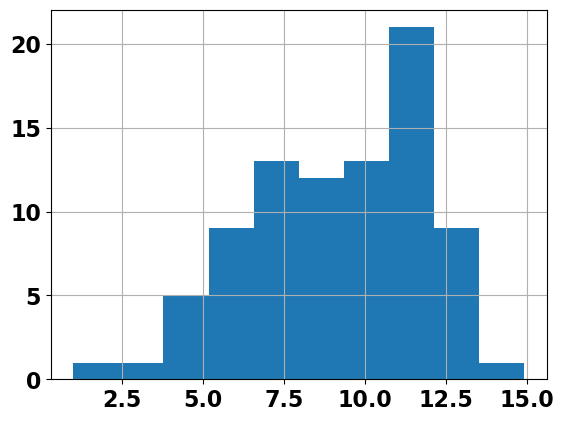

In [30]:
mean_bafu_daily_df.temp_mean.hist()

In [75]:
# Defining the colour categories and mapping lists
color_categories_temp_mean = [(0, 5), (5, 6), (6, 7), (7, 8), (8, np.inf)]
color_categories_ph_mean = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_EC_mean = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_o_mean = [(-np.inf, 10), (10.25, 10.5), (10.5, 10.75), (10.75, 11), (11, np.inf)]
color_categories_count_naduf = [(-np.inf, 20), (20, 25), (25, 30), (30, 35), (35, np.inf)]
color_categories_count_bafu = [(-np.inf, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_count_nawa = [(-np.inf, 20), (20, 22), (22, 24), (24, 26), (26, np.inf)]
color_categories_count_isot = [(-np.inf, 1.0), (1.0, np.inf)]
color_categories_temp_mean_naduf = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_temp_mean_nawa = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_EC_mean_naduf = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_EC_mean_nawa = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_ph_mean_naduf = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_ph_mean_nawa = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_bafu_nawat_dist = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
color_categories_bafu_nawaf_dist = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]

color_categories_Cl = [(-np.inf, 5), (5, 7.5), (7.5, 10), (10, 12.5), (12.5, np.inf)]
color_categories_alk = [(-np.inf, 2), (2, 3), (3, 4), (4, 5), (5, np.inf)]
color_categories_NO3_N = [(-np.inf, 1), (1, 2), (2, 3), (3, 4), (4, np.inf)]
color_categories_SO4 = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_NO2_N = [(-np.inf, 0.01), (0.01, 0.02), (0.02, 0.03), (0.03, 0.04), (0.04, np.inf)]
color_categories_NH4_N = [(-np.inf, 0.025), (0.025, 0.05), (0.05, 0.075), (0.075, 0.1), (0.1, np.inf)]

color_categories_tp = [(-np.inf, 0.02), (0.02, 0.04), (0.04, 0.06), (0.06, 0.08), (0.08, np.inf)]
color_categories_frac_snow = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_hp_freq = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_hp_dur = [(-np.inf, 1.2), (1.2, 1.4), (1.4, 1.6), (1.6, 1.8), (1.8, np.inf)]
color_categories_lp_freq = [(-np.inf, 175), (175, 200), (200,225), (225, 250), (250, np.inf)]
color_categories_lp_dur = [(-np.inf, 4), (4, 6), (6, 8), (8, 10), (10, np.inf)]
color_categories_ele_mt_max = [(-np.inf, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, np.inf)]
color_categories_ele_mt_mean = [(-np.inf, 500), (500, 1000), (1000, 1500), (1500, 2000), (2000, np.inf)]
color_categories_slp_dg_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_elon_ratio = [(-np.inf, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, np.inf)]
color_categories_bedrk_dep = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_perc_low_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_medium_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_high_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_root_dep_mean = [(-np.inf, 40), (40, 60), (60, 80), (80, 100), (100, np.inf)]
color_categories_soil_tawc_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_sand_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_silt_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_clay_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_grav_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_lai_mean = [(-np.inf, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, 0.25), (0.25, np.inf)]
color_categories_ndvi_mean = [(-np.inf, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, np.inf)]
color_categories_lulc_2006_urban = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_lulc_2006_NonIrriAgri = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_Agric = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_forest = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_grass = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_agriculture = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_dam_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_lakes_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_area = [(-np.inf, 100), (100, 250), (250, 500), (500, 1000), (1000, np.inf)]

# Color mapping list
color_mapping_list = {
    "temp_mean":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean, 0, 10, 1, 10, color_palette='custom'),
    "ph_mean": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean, 0, 2, 0.5, 10, color_palette='blues'),
    "EC_mean": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean, -2, 5, 1, 10),
    "o_mean": generate_legend_and_color_mapping("O [mg/l]", color_categories_o_mean, 0, 10, 0.5, 10, color_palette='vegetation'),
    "count_naduf": generate_legend_and_color_mapping("NAWA-Fracht [-]", color_categories_count_naduf, 0, 1, 0.2, 10, color_palette='blues'),
    "count_bafu": generate_legend_and_color_mapping("BAFU [-]", color_categories_count_bafu, 100, 300, 50, 10, color_palette='blues'),
    "count_nawa":  generate_legend_and_color_mapping("NAWA-Trend [-]", color_categories_count_nawa, 0, 2, 0.25, 10, color_palette='blues'),
    "count_isot":  generate_legend_and_color_mapping("ISOT [-]", color_categories_count_isot, 0, 20, 2, 10, color_palette='blues'),
    "temp_mean_naduf":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_naduf, 0, 100, 1, 10, color_palette='custom'),
    "temp_mean_nawa":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_nawa, 0, 100, 1, 10, color_palette='custom'),
    "EC_mean_naduf": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_naduf, -2, 5, 1, 10),
    "EC_mean_nawa": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_nawa, -2, 5, 1, 10),
    "ph_mean_nawa": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_nawa, 0, 2, 0.5, 10, color_palette='blues'),
    "ph_mean_naduf": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_naduf, 0, 2, 0.5, 10, color_palette='blues'),
    "bafu_nawat_dist": generate_legend_and_color_mapping("Distance [km]", color_categories_bafu_nawat_dist, 0, 2, 0.5, 10, color_palette='custom'),
    "bafu_nawaf_dist": generate_legend_and_color_mapping("Distance [km]", color_categories_bafu_nawaf_dist, 0, 2, 0.5, 10, color_palette='custom'),

    "Cl":  generate_legend_and_color_mapping("Cl [mg/l]", color_categories_Cl, 0, 30, 1, 10),
    "alk":  generate_legend_and_color_mapping("Alk. [mmol/l]", color_categories_alk, 0, 350, 50, 10, color_palette='custom'),
    "NO3_N":  generate_legend_and_color_mapping("NO3 [mg/l]", color_categories_NO3_N, 0, 150, 1, 10, color_palette='custom'),
    "SO4":  generate_legend_and_color_mapping("SO4 [mg/l]", color_categories_SO4, 0, 10, 1, 10, color_palette='blues'),
    "NO2_N":  generate_legend_and_color_mapping("NO2 [mg/l]", color_categories_NO2_N, 0, 10, 1, 10, color_palette='custom'),
    "NH4_N": generate_legend_and_color_mapping("NH4 [mg/l]", color_categories_NH4_N, 0, 5, 1, 10, color_palette='custom'),
    "tp":  generate_legend_and_color_mapping("Total P [mg/l]", color_categories_tp, 0, 10, 1, 10, color_palette='default'),
    "frac_snow":  generate_legend_and_color_mapping("Snow frac. [-]", color_categories_frac_snow, 0, 10, 1, 10, color_palette='default'),
    "hp_freq":  generate_legend_and_color_mapping("HP freq. [days/year]", color_categories_hp_freq, 0, 10, 1, 10, color_palette='default'),
    "hp_dur": generate_legend_and_color_mapping("HP dur. [days]", color_categories_hp_dur, 0, 5, 1, 10, color_palette='default'),
    "lp_freq":  generate_legend_and_color_mapping("LP freq. [days/year]", color_categories_lp_freq, 0, 10, 0.2, 10, color_palette='default'),
    "lp_dur":  generate_legend_and_color_mapping("LP dur. [days]", color_categories_lp_dur, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_max":  generate_legend_and_color_mapping("Elev-max [m]", color_categories_ele_mt_max, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_mean":  generate_legend_and_color_mapping("Mean elev. [m]", color_categories_ele_mt_mean, 0, 10, 1, 10, color_palette='default'),
    "slp_dg_mean":  generate_legend_and_color_mapping("Mean slope [d]", color_categories_slp_dg_mean, 0, 10, 1, 10, color_palette='default'),
    "elon_ratio":  generate_legend_and_color_mapping("Elon. ratio [-]", color_categories_elon_ratio, 0, 10, 1, 10, color_palette='default'),
    "bedrk_dep":  generate_legend_and_color_mapping("Bedrock depth [m]", color_categories_bedrk_dep, 0, 10, 1, 10, color_palette='default'),        
    "perc_low_perm":  generate_legend_and_color_mapping("Low perm. [%]", color_categories_perc_low_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_medium_perm":  generate_legend_and_color_mapping("Medium perm. [%]", color_categories_perc_medium_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_high_perm":  generate_legend_and_color_mapping("High perm. [%]", color_categories_perc_high_perm, 0, 10, 1, 10, color_palette='default'),
    "root_dep_mean":  generate_legend_and_color_mapping("Root depth [cm]", color_categories_root_dep_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_tawc_mean":  generate_legend_and_color_mapping("TAWC [cm]", color_categories_soil_tawc_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_sand_mean":  generate_legend_and_color_mapping("Sand [%]", color_categories_soil_fra_sand_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_silt_mean":  generate_legend_and_color_mapping("Silt [%]", color_categories_soil_fra_silt_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_clay_mean":  generate_legend_and_color_mapping("Clay [%]", color_categories_soil_fra_clay_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_grav_mean":  generate_legend_and_color_mapping("Gravel [%]", color_categories_soil_fra_grav_mean, 0, 10, 1, 10, color_palette='default'),
    "lai_mean":  generate_legend_and_color_mapping("LAI [-]", color_categories_lai_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "ndvi_mean":  generate_legend_and_color_mapping("NDVI [-]", color_categories_ndvi_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_urban":  generate_legend_and_color_mapping("Urban [-]", color_categories_lulc_2006_urban, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_NonIrriAgri":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_NonIrriAgri, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_Agric":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_Agric, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_forest":  generate_legend_and_color_mapping("Forests [-]", color_categories_lulc_2006_forest, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_grass":  generate_legend_and_color_mapping("Grasslands [-]", color_categories_lulc_2006_grass, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_agriculture":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_agriculture, 0, 10, 1, 10, color_palette='custom'),
    "dam_num":  generate_legend_and_color_mapping("Dams [-]", color_categories_dam_num, 0, 10, 1, 10, color_palette='default'),
    "lakes_num":  generate_legend_and_color_mapping("Lakes [-]", color_categories_lakes_num, 0, 10, 1, 10, color_palette='default'),
    "area_estreams":  generate_legend_and_color_mapping("Area [km2]", color_categories_area, 0, 10, 1, 10, color_palette='default'),
}




def plot_variable_subplot(ax, variable, estreams_attributes, color_mapping_list, gdf, total_bins=20):
    """
    Plot a variable on a subplot along with its legend and histogram, ensuring correct bin edges from color_mapping
    and equal-width bins.

    Parameters:
        ax (matplotlib Axes): Subplot axes.
        variable (str): Name of the variable.
        estreams_attributes (DataFrame): DataFrame containing attribute data.
        color_mapping_list (dict): Dictionary containing color mapping information.
        gdf (GeoDataFrame): GeoDataFrame for plotting shapefile.
        total_bins (int): Total number of bins for the histogram (ensuring equal width).

    Returns:
        None
    """
    # Extract color mapping information from the color mapping list
    legend_title = color_mapping_list[variable][0]
    color_categories = color_mapping_list[variable][1]
    legend_labels = color_mapping_list[variable][2]
    color_mapping = color_mapping_list[variable][3]

    # Determine the min and max values from the data
    data_min = estreams_attributes[variable].min()
    data_max = estreams_attributes[variable].max()

    # Create uniform bin edges
    hist_bins = np.linspace(data_min, data_max, total_bins + 1)

    # Set the background color to white
    ax.set_facecolor('white')

    # Plot the shapefile with white facecolor and black boundaries
    gdf.plot(ax=ax, facecolor='none', edgecolor='none', linewidth=0.2)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(47.5, 50.5)

    # Plot the data on the map
    plot_num_measurementsmap_subplot(plotsome=estreams_attributes, xcoords="lon", ycoords="lat", column_labels=variable,
                                     color_categories=color_categories, color_mapping=color_mapping, 
                                     legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax=ax, 
                                     set_map_limits=True, minx=4.5, miny=47.5, maxx=8, maxy=50.5, show_legend=False, 
                                     legend_outside=False, north_arrow=False, markersize_map=40)

    # Turn off both x-axis and y-axis
    ax.set_axis_off()

    # Create a histogram inset axis within the subplot
    hist_ax = ax.inset_axes([0.05, 0.15, 0.15, 0.175])  # Adjust the values as needed

    # Extract the data for the histogram
    hist_data = estreams_attributes[variable].dropna()

    # Plot the histogram with manually controlled uniform bins
    counts, bins, patches = hist_ax.hist(hist_data, bins=hist_bins, color='white', edgecolor='black', alpha=0.7, linewidth=0.4)

    # Assign colors based on color_categories to the bins
    for patch, bin_left, bin_right in zip(patches, bins[:-1], bins[1:]):
        # Iterate through color categories and check if the bin falls within the category
        for low, high in color_categories:
            if low <= bin_left < high:
                patch.set_facecolor(color_mapping[f'{low}-{high}'])
                break
        # For bins beyond the last threshold, use the color for the last defined category
        if bin_left >= color_categories[-1][0]:
            patch.set_facecolor(color_mapping[f'{color_categories[-1][0]}-{np.inf}'])

    # Hide the axis spines and ticks for the inset axis
    hist_ax.spines['top'].set_visible(False)
    hist_ax.spines['right'].set_visible(False)
    hist_ax.spines['left'].set_visible(True)
    hist_ax.spines['bottom'].set_visible(True)
    hist_ax.set_facecolor('none')
    hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=12)

    # Get the x-axis limits
    x_min, x_max = hist_ax.get_xlim()

    # Compute the midpoint of the x-axis
    middle_tick = (x_min + x_max) / 2

    # Set x-ticks to show only the middle tick
    hist_ax.set_xticks([middle_tick])

    # Set the label for the middle tick
    hist_ax.set_xticklabels([f'{middle_tick:.1f}'], fontsize=8, fontweight="bold")

    hist_ax.set_ylabel("Count", fontsize=8, fontweight="bold")

    # Set custom y-axis ticks to show automatically but label only the middle one
    y_ticks = hist_ax.get_yticks()
    mid_tick = y_ticks[len(y_ticks) // 2]
    hist_ax.set_yticks([mid_tick])  # Set only the middle tick
    hist_ax.set_yticklabels([f'{mid_tick:.0f}'], fontsize=8, fontweight="bold")

    # Call the function to add a circular legend
    add_circular_legend(ax, color_mapping, legend_labels, legend_title="")

    # Adjust aspect ratio
    ax.set_aspect('equal')

    # Hide spines for the main plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


def plot_num_measurementsmap_subplot(ax, plotsome: pd.DataFrame, xcoords="lon", ycoords="lat", column_labels="num_yearly_complete",
                                     crsproj='epsg:4326', showcodes=False, markersize_map=3, north_arrow=True, 
                                     set_map_limits=False, minx=0, miny=0, maxx=1, maxy=1, color_categories=None, color_mapping=None,
                                     legend_title=None, legend_labels=None, legend_loc='upper left', show_legend = True, 
                                     legend_outside=True, legend_bbox_to_anchor=(0.5, 1)):  # Add legend_outside and legend_bbox_to_anchor parameters:
    """
    Plot data on a subplot with additional options.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot where the data will be plotted.
        plotsome (pd.DataFrame): The data to be plotted.
        xcoords (str): The name of the column containing x-coordinates.
        ycoords (str): The name of the column containing y-coordinates.
        column_labels (str): The name of the column containing data for coloring.
        crsproj (str): The coordinate reference system (CRS) for the data.
        showcodes (bool): Whether to show data labels.
        markersize_map (int): Size of the markers.
        north_arrow (bool): Whether to include a north arrow.
        set_map_limits (bool): Whether to set specific map limits.
        minx (float): Minimum x-axis limit.
        miny (float): Minimum y-axis limit.
        maxx (float): Maximum x-axis limit.
        maxy (float): Maximum y-axis limit.
        color_categories (list): List of color categories for data bins.
        color_mapping (dict): Mapping of color categories to colors.
        legend_title (str): Title for the legend.
        legend_labels (list): Labels for the legend items.
        legend_loc (str): Location of the legend.
        show_legend (bool): Whether to display the legend.
        legend_outside (bool): Whether to place the legend outside the plot.
        legend_bbox_to_anchor (tuple): Position of the legend (x, y).

    Returns:
        None
    """
    # Prepare the data for plotting
    crs = {'init': crsproj}
    geometry = plotsome.apply(lambda row: Point(row[xcoords], row[ycoords]), axis=1)
    geodata = gpd.GeoDataFrame(plotsome, crs=crs, geometry=geometry)
    geodatacond = geodata

    if color_categories is not None and color_mapping is not None:
        geodatacond['color_category'] = pd.cut(geodatacond[column_labels], bins=[c[0] for c in color_categories] + [np.inf], labels=[f'{c[0]}-{c[1]}' for c in color_categories])
    else:
        raise ValueError("Both color_categories and color_mapping must be provided.")

    # Plotting and legend:
    for category, group in geodatacond.groupby('color_category'):
        #group.plot(ax=ax, color=color_mapping[category], markersize=markersize_map, legend=False, label=category)
        group.plot(ax=ax, marker='o', color=color_mapping[category], markersize=markersize_map, legend=False, label=category, edgecolor='none')
    
    if showcodes == True:
        geodatacond["Code"] = geodatacond.index
        geodatacond.plot(column='Code', ax=ax)
        for x, y, label in zip(geodatacond.geometry.x, geodatacond.geometry.y, geodatacond.index):
            ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
        plt.rcParams.update({'font.size': 12})

    if set_map_limits == False:
        total_bounds = geodatacond.total_bounds
        minx, miny, maxx, maxy = total_bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)

    # Plot the legend
    if legend_labels is None:
        legend_labels = [f'{c[0]}-{c[1]}' for c in color_categories]
        
    if show_legend:
        if legend_outside:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=legend_bbox_to_anchor,
                               bbox_transform=ax.transAxes, frameon=False)  # Use bbox_transform to position the legend
        else:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc=legend_loc, frameon=False)
            
        if legend_outside:
            ax.add_artist(legend)
            
    # Plot the north arrow:
    if north_arrow == True:
        x, y, arrow_length = 0.975, 0.125, 0.1

        ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=18,
                    xycoords='axes fraction')
  
    # Set font family and size using rcParams
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 12  # You can adjust this value as needed
    
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def add_circular_legend(ax, color_mapping, legend_labels, legend_title):
    """
    Add a circular legend to the specified axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to which the legend will be added.
        color_mapping (dict): A dictionary mapping legend labels to colors.
        legend_labels (list): List of legend labels.
        legend_title (str): Title for the legend.

    Returns:
        None
    """
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=7) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position

In [45]:
mean_bafu_daily_df

,temp_mean,ph_mean,EC_mean,o_mean,lat,lon
camels_id,,,,,,
2009,7.320306,8.091369,290.656359,11.438225,NaN,NaN
2011,6.993472,NaN,NaN,NaN,NaN,NaN
2016,12.009385,8.023153,377.401069,10.366171,NaN,NaN
2018,11.870272,8.087549,262.998814,10.394436,NaN,NaN
2019,5.994370,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2615,12.578869,NaN,NaN,NaN,NaN,NaN
2617,5.718993,NaN,NaN,NaN,NaN,NaN
2623,3.796978,NaN,NaN,NaN,NaN,NaN


In [69]:
network_camels_ch_chem

,gauge_id,sensor_id,nawaf_id,nawat_id,isot_id,chirp_id,gauge_name,water_body_name,gauge_easting,gauge_northing,...,gauge_northing_nawaf,area_nawaf,foen_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,foen_nawat_dist,q_nawat_corrector,remarks
0,2009,2009.0,1837.0,1837.0,NIO04,NaN,Porte du Scex,Rhône,557660,133280,...,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,1.000000,NaN
1,2011,2011.0,NaN,4070.0,NaN,NaN,Sion,Rhône,593770,118630,...,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,1.000005,NaN
2,2016,2016.0,1833.0,1833.0,NIO02,NaN,Brugg,Aare,657000,259360,...,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,0.999999,NaN
3,2018,2018.0,1835.0,1339.0,NaN,NaN,Mellingen,Reuss,662830,252580,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,1.010250,NaN
4,2019,2019.0,NaN,1852.0,NIO01,NaN,Brienzwiler,Aare,649930,177380,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,1.001097,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2617,2617.0,NaN,NaN,NaN,NaN,Müstair,Rom,830800,168700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,2623,2623.0,NaN,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,2634,2634.0,6169.0,1181.0,NaN,NaN,Emmen,Kleine Emme,663700,213630,...,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...
113,2635,2635.0,NaN,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Station moved in 2012?


In [70]:
network_camels_ch_chem_gdf = network_camels_ch_chem.copy()

network_camels_ch_chem_gdf.set_index("gauge_id", inplace=True)

In [71]:

mean_bafu_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]

#mean_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

mean_naduf_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]
#mean_nawa_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]


In [72]:
mean_bafu_daily_df

,temp_mean,ph_mean,EC_mean,o_mean,lat,lon
camels_id,,,,,,
2009,7.320306,8.091369,290.656359,11.438225,46.35,6.89
2011,6.993472,NaN,NaN,NaN,46.22,7.36
2016,12.009385,8.023153,377.401069,10.366171,47.48,8.19
2018,11.870272,8.087549,262.998814,10.394436,47.42,8.27
2019,5.994370,NaN,NaN,NaN,46.75,8.09
...,...,...,...,...,...,...
2615,12.578869,NaN,NaN,NaN,47.56,7.59
2617,5.718993,NaN,NaN,NaN,46.63,10.45
2623,3.796978,NaN,NaN,NaN,46.53,8.35


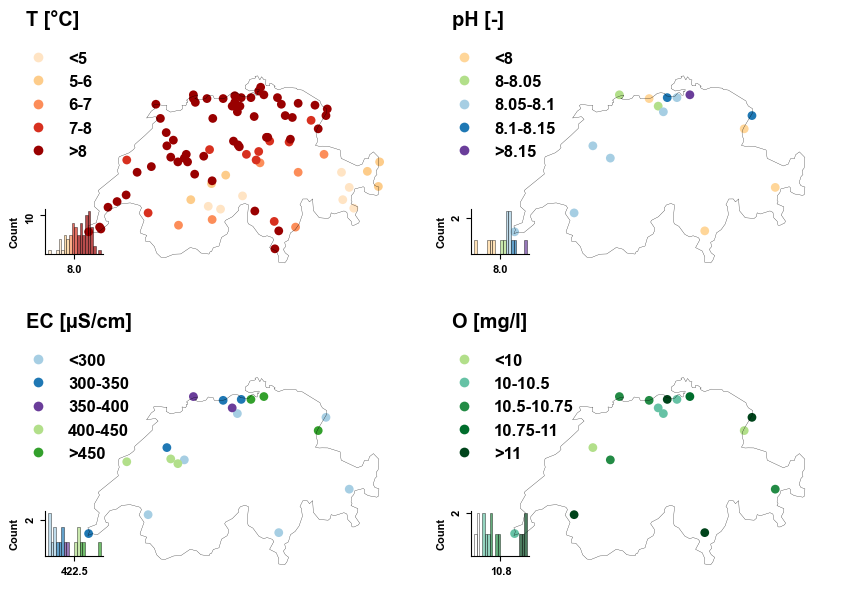

In [82]:
# List of variables
variable_list = ["temp_mean", "ph_mean", "EC_mean", "o_mean"]
#variable_list = ["ph_mean"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_bafu_daily_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    #axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

#fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

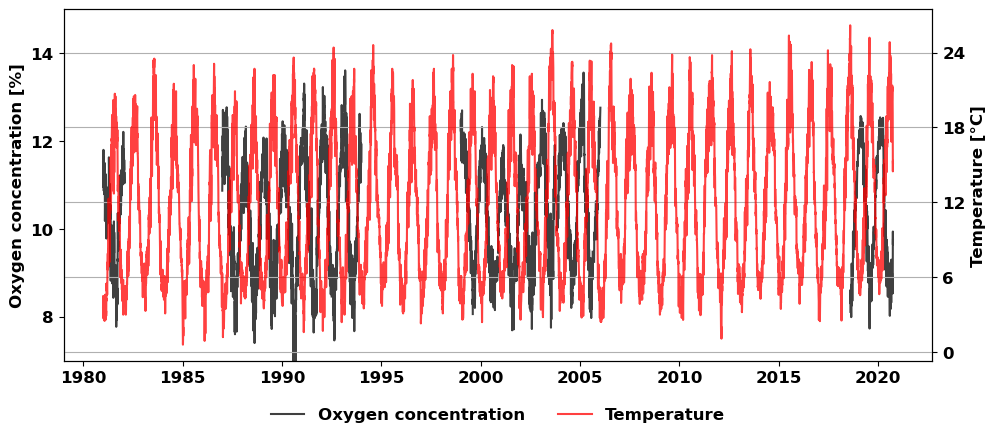

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib

# Set global font to Sans-serif
matplotlib.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 8})  # Set global font size

# Create figure with two subplots (left: histogram, right: time series with twin axes)
fig, axs = plt.subplots(figsize=(10, 4))


# Right subplot: Time series with twin axes
ax1 = axs  # Primary axis for Oxygen
ax2 = ax1.twinx()  # Secondary axis for Temperature

# Plot the first variable (oxygen concentration) on the primary y-axis
ax1.set_ylabel("Oxygen concentration [%]", fontsize=12)
temp_line, = ax1.plot(filtered_df.loc["1980-10-01":"2020-09-30"].index, filtered_df.loc["1980-10-01":"2020-09-30", "O2C_sensor"], color="k", label="Oxygen concentration", alpha=0.75)
ax1.tick_params(axis="y", labelsize=12)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))  # Limit to 5 ticks

# Plot the second variable (temperature) on the secondary y-axis
ax2.set_ylabel("Temperature [°C]", fontsize=12)
oxygen_line, = ax2.plot(filtered_df.loc["1980-10-01":"2020-09-30"].index, filtered_df.loc["1980-10-01":"2020-09-30", "temp_sensor"], color="red", label="Temperature", alpha=0.75)
ax2.tick_params(axis="y", labelsize=12)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))  # Limit to 5 ticks
ax1.tick_params(axis="x", labelsize=12)

# Set y-axis limit
ax1.set_ylim(7, 15)

# Format x-axis labels for subplot 2
#date_format = mdates.DateFormatter('%d.%m.%Y')
#ax1.xaxis.set_major_formatter(date_format)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))


# Add a combined legend at the bottom center
fig.legend(handles=[temp_line, oxygen_line], loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=12, frameon=False, ncol=2)

# Adjust layout and show plots
fig.tight_layout()
plt.grid(True)

#fig.savefig(r'results\figs\fig_hist_plot_temp_o.png', dpi=300, bbox_inches='tight')

plt.show()

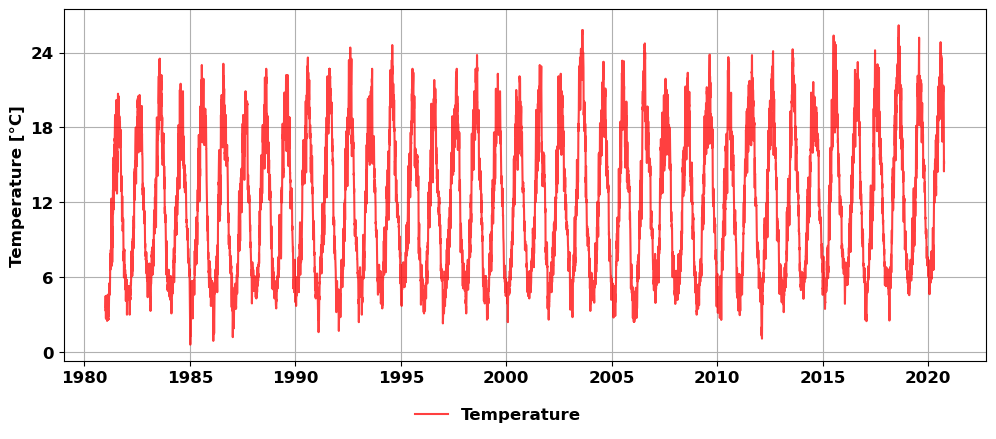

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib

# Set global font to Sans-serif
matplotlib.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 8})  # Set global font size

# Create figure with two subplots (left: histogram, right: time series with twin axes)
fig, axs = plt.subplots(figsize=(10, 4))


# Right subplot: Time series with twin axes
ax1 = axs  # Primary axis for Oxygen

# Plot the second variable (temperature) on the secondary y-axis
ax1.set_ylabel("Temperature [°C]", fontsize=12)
oxygen_line, = ax1.plot(filtered_df.loc["1980-10-01":"2020-09-30"].index, filtered_df.loc["1980-10-01":"2020-09-30", "temp_sensor"], color="red", label="Temperature", alpha=0.75)
ax1.tick_params(axis="y", labelsize=12)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))  # Limit to 5 ticks
ax1.tick_params(axis="x", labelsize=12)

# Set y-axis limit

# Format x-axis labels for subplot 2
#date_format = mdates.DateFormatter('%d.%m.%Y')
#ax1.xaxis.set_major_formatter(date_format)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))


# Add a combined legend at the bottom center
fig.legend(handles=[oxygen_line], loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=12, frameon=False, ncol=2)

# Adjust layout and show plots
fig.tight_layout()
plt.grid(True)

#fig.savefig(r'results\figs\fig_hist_plot_temp_o.png', dpi=300, bbox_inches='tight')

plt.show()

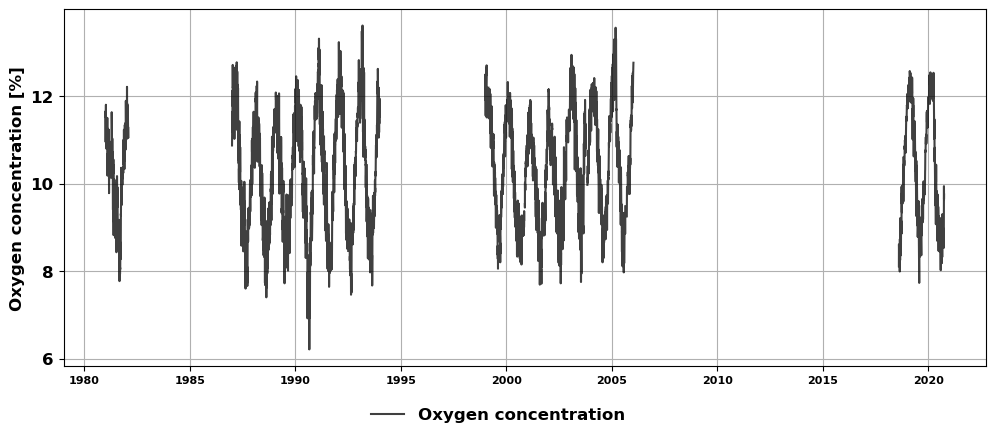

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib

# Set global font to Sans-serif
matplotlib.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 8})  # Set global font size

# Create figure with two subplots (left: histogram, right: time series with twin axes)
fig, axs = plt.subplots(figsize=(10, 4))


# Right subplot: Time series with twin axes
ax1 = axs  # Primary axis for Oxygen

# Plot the first variable (oxygen concentration) on the primary y-axis
ax1.set_ylabel("Oxygen concentration [%]", fontsize=12)
temp_line, = ax1.plot(filtered_df.loc["1980-10-01":"2020-09-30"].index, filtered_df.loc["1980-10-01":"2020-09-30", "O2C_sensor"], color="k", label="Oxygen concentration", alpha=0.75)
ax1.tick_params(axis="y", labelsize=12)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))  # Limit to 5 ticks

# Set y-axis limit

# Format x-axis labels for subplot 2
#date_format = mdates.DateFormatter('%d.%m.%Y')
#ax1.xaxis.set_major_formatter(date_format)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))


# Add a combined legend at the bottom center
fig.legend(handles=[temp_line], loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=12, frameon=False, ncol=2)

# Adjust layout and show plots
fig.tight_layout()
plt.grid(True)

#fig.savefig(r'results\figs\fig_hist_plot_temp_o.png', dpi=300, bbox_inches='tight')

plt.show()

In [83]:
# Define the path where the CSV files are located
path = r"results\\Dataset\\stream_water_chemistry\\timeseries\\daily\\"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 1  # Adjust this based on where you want to start counting

# Initialize an empty list to store the data
data = []

file = r'results\\Dataset\\stream_water_chemistry\\timeseries\\daily\\CAMELS_CH_Chem_daily_2018.csv'
# Extract the number from the file name (assuming it's part of the file name)
file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
# Read the CSV file
df = pd.read_csv(file, encoding='latin', index_col=0)
df.index = pd.to_datetime(df.index)

# Filter out the columns starting from the specified index
filtered_df = df.iloc[:, :]
    
# Here we take out the > or < before converting to a numeric value:
filtered_df = filtered_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
filtered_df = filtered_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

# There are some non-numeric things in the columns, instead of NaNs
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

In [84]:
filtered_df

,temp_sensor,pH_sensor,ec_sensor,O2C_sensor
date,,,,
1981-01-01,3.60,7.79,257.5,11.53
1981-01-02,3.80,7.87,254.2,11.65
1981-01-03,4.20,7.87,263.3,11.38
1981-01-04,4.50,7.81,273.1,10.95
1981-01-05,3.30,7.84,252.1,11.38
...,...,...,...,...
2020-12-27,5.58,8.32,300.2,12.08
2020-12-28,5.73,8.29,296.4,11.79
2020-12-29,5.94,8.29,297.3,11.81


ValueError: aspect must be finite and positive 

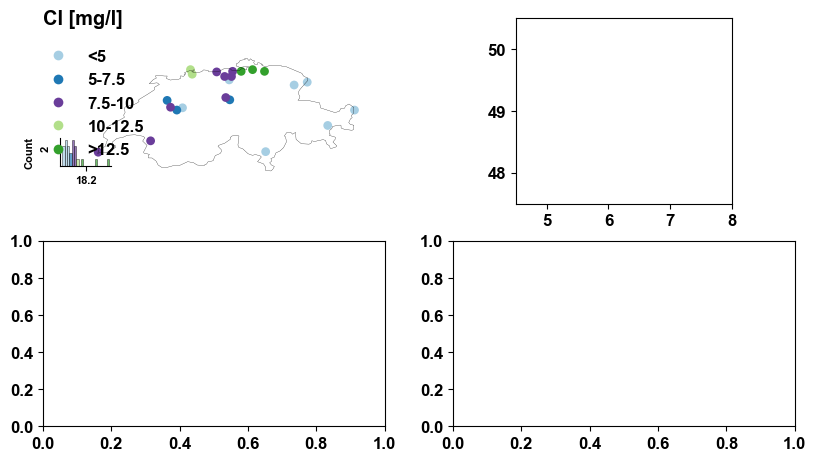

In [77]:
# List of variables
variable_list = ["Cl", "alk", "NO3_N", "SO4"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_naduf_daily_df, color_mapping_list, gdf)


    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

#fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

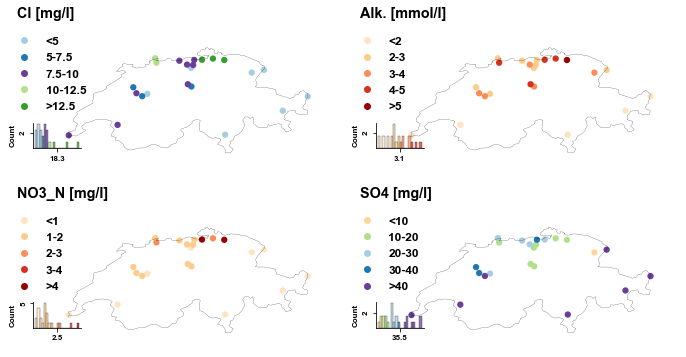

In [110]:
# List of variables
variable_list = ["Cl", "alk", "NO3_N", "SO4"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_naduf_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

In [ ]:
# List of variables
variable_list = ["NO3_N", "NO2_N", "NH4_N", "tp"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_nawa_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

NameError: name 'mean_naduf_df' is not defined

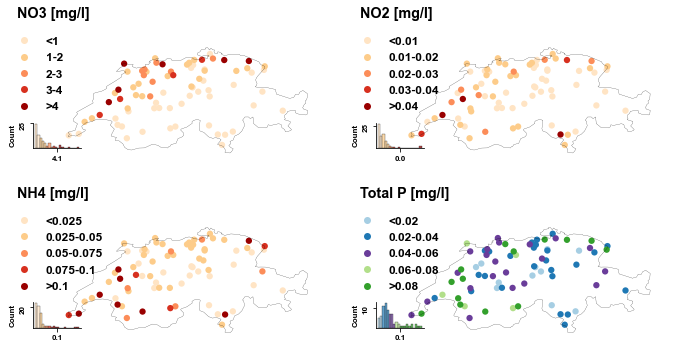

In [115]:
# List of variables
variable_list = ["NO3_N", "NO2_N", "NH4_N", "tp"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_nawa_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

# Isotopes

100%|██████████| 20/20 [00:00<00:00, 132.04it/s]


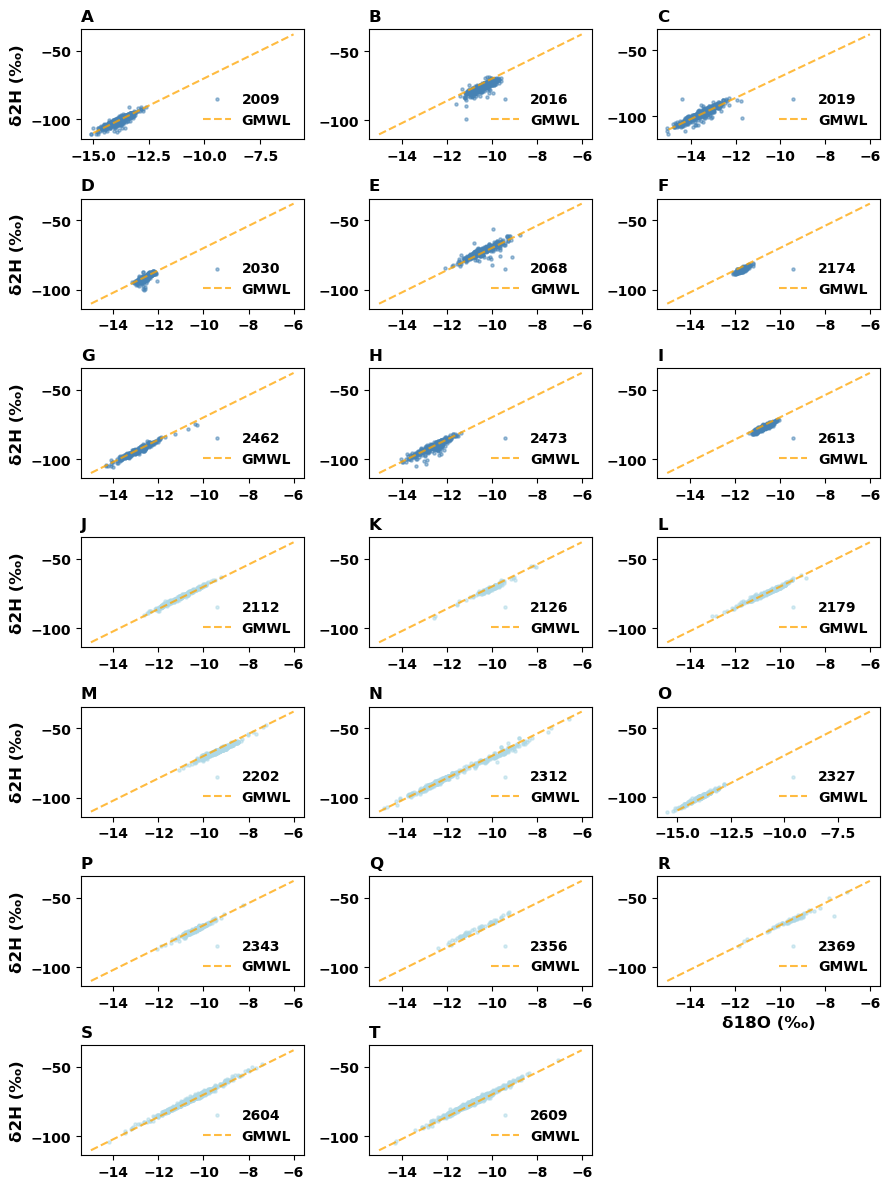

In [27]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

# Set font properties using rcParams
mpl.rcParams['font.family'] = 'sans-serif'  # Change the font family
mpl.rcParams['font.size'] = 10         # Change the font size
mpl.rcParams['font.weight'] = 'bold'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Function to extract basin_id from the filename
def get_basin_id_from_filename(filename):
    basename = os.path.basename(filename)
    # Assuming the basin_id is the last part of the file name before ".csv"
    basin_id = basename.split('_')[-1].split('.')[0]
    return basin_id


path1 = r"results\Dataset\isotopes\streamwater\isot"
path2 = r"results\Dataset\isotopes\streamwater\ch_irp"

csv_files = glob.glob(os.path.join(path1, "*.csv")) + glob.glob(os.path.join(path2, "*.csv"))

# Initialize the number of rows and columns for subplots
num_plots = 21  # Number of subplots (e.g., 9)
nrows = 7  # 3 rows
ncols = 3  # 3 columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 12))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Loop through each CSV file and create a subplot
for i, file in enumerate(tqdm.tqdm(csv_files[:num_plots])):  # Only process the first 9 files
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Extract the basin_id
    basin_id = get_basin_id_from_filename(file)

    # Extract the relevant columns (assuming they are named 'delta_18o' and 'delta_2h')
    delta_18o = df['delta_18o']
    delta_2h = df['delta_2h']

    # Plot δ2H vs δ18O for your data on the current axis
    if i <= 8:
        axes[i].scatter(delta_18o, delta_2h, label=f'{basin_id}', color='steelblue', marker='o', s=5, alpha=0.5)

    else:
        axes[i].scatter(delta_18o, delta_2h, label=f'{basin_id}', color='lightblue', marker='o', s=5, alpha=0.5)

    # Plot the Global Meteoric Water Line (GMWL) on the current axis
    gmwl_d18O = range(-15, -5)  # Adjust the range based on your δ18O values
    gmwl_d2H = [8 * d18O + 10 for d18O in gmwl_d18O]
    axes[i].plot(gmwl_d18O, gmwl_d2H, label='GMWL', color='orange', linestyle='--', alpha=0.75)

    # Set labels, title, and limits for each subplot
    row = i // 3
    col = i % 3

    # Only leftmost column → Y label
    if col == 0:
        axes[i].set_ylabel('δ2H (‰)', fontsize=12)

    # Only bottom row → X label
    if row == 7:
        axes[i].set_xlabel('δ18O (‰)', fontsize=12)

    
    axes[i].set_title(f'{chr(97 + i).upper()}', loc='left', fontweight='bold')
    #axes[i].grid(True)
    axes[i].legend(frameon=False, loc="lower right")
    #axes[i].set_xlim(-15, -8)
    #axes[i].set_ylim(-110, -80)

axes[17].set_xlabel('δ18O (‰)', fontsize=12)
axes[-1].axis('off')  # turns off the last subplot (bottom-right)

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_isotopes_all.png', dpi=300, bbox_inches='tight')

In [139]:
# Defining the colour categories and mapping lists
color_categories_temp_mean = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_ph_mean = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_EC_mean = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_o_mean = [(-np.inf, 10), (10.25, 10.5), (10.5, 10.75), (10.75, 11), (11, np.inf)]
color_categories_count_naduf = [(-np.inf, 20), (20, 25), (25, 30), (30, 35), (35, np.inf)]
color_categories_count_bafu = [(-np.inf, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_count_nawa = [(-np.inf, 20), (20, 22), (22, 24), (24, 26), (26, np.inf)]
color_categories_count_isot = [(-np.inf, 1.0), (1.0, np.inf)]
color_categories_temp_mean_naduf = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_temp_mean_nawa = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_EC_mean_naduf = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_EC_mean_nawa = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_ph_mean_naduf = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_ph_mean_nawa = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_foen_nawat_dist = [(-np.inf, 0), (0, 3), (3, 6), (6, 9), (9, np.inf)]
color_categories_foen_nawaf_dist = [(-np.inf, 0), (0, 3), (3, 6), (6, 9), (9, np.inf)]
color_categories_ionicbalance = [(-np.inf, 1.0), (1.0, 1.25), (1.25, 1.50), (1.50, np.inf)]

color_categories_Cl = [(-np.inf, 5), (5, 7.5), (7.5, 10), (10, 12.5), (12.5, np.inf)]
color_categories_alk = [(-np.inf, 2), (2, 3), (3, 4), (4, 5), (5, np.inf)]
color_categories_NO3_N = [(-np.inf, 1), (1, 2), (2, 3), (3, 4), (4, np.inf)]
color_categories_SO4 = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_NO2_N = [(-np.inf, 0.01), (0.01, 0.02), (0.02, 0.03), (0.03, 0.04), (0.04, np.inf)]
color_categories_NH4_N = [(-np.inf, 0.025), (0.025, 0.05), (0.05, 0.075), (0.075, 0.1), (0.1, np.inf)]

color_categories_tp = [(-np.inf, 0.02), (0.02, 0.04), (0.04, 0.06), (0.06, 0.08), (0.08, np.inf)]
color_categories_frac_snow = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_hp_freq = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_hp_dur = [(-np.inf, 1.2), (1.2, 1.4), (1.4, 1.6), (1.6, 1.8), (1.8, np.inf)]
color_categories_lp_freq = [(-np.inf, 175), (175, 200), (200,225), (225, 250), (250, np.inf)]
color_categories_lp_dur = [(-np.inf, 4), (4, 6), (6, 8), (8, 10), (10, np.inf)]
color_categories_ele_mt_max = [(-np.inf, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, np.inf)]
color_categories_ele_mt_mean = [(-np.inf, 500), (500, 1000), (1000, 1500), (1500, 2000), (2000, np.inf)]
color_categories_slp_dg_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_elon_ratio = [(-np.inf, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, np.inf)]
color_categories_bedrk_dep = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_perc_low_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_medium_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_high_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_root_dep_mean = [(-np.inf, 40), (40, 60), (60, 80), (80, 100), (100, np.inf)]
color_categories_soil_tawc_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_sand_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_silt_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_clay_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_grav_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_lai_mean = [(-np.inf, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, 0.25), (0.25, np.inf)]
color_categories_ndvi_mean = [(-np.inf, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, np.inf)]
color_categories_lulc_2006_urban = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_lulc_2006_NonIrriAgri = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_Agric = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_forest = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_grass = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_agriculture = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_dam_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_lakes_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_area = [(-np.inf, 100), (100, 250), (250, 500), (500, 1000), (1000, np.inf)]

# Color mapping list
color_mapping_list = {
    "temp_mean":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean, 0, 10, 1, 10, color_palette='custom'),
    "ph_mean": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean, 0, 2, 0.5, 10, color_palette='blues'),
    "EC_mean": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean, -2, 5, 1, 10),
    "o_mean": generate_legend_and_color_mapping("O [mg/l]", color_categories_o_mean, 0, 10, 0.5, 10, color_palette='vegetation'),
    "count_naduf": generate_legend_and_color_mapping("NAWA-Fracht [-]", color_categories_count_naduf, 0, 1, 0.2, 10, color_palette='blues'),
    "count_bafu": generate_legend_and_color_mapping("BAFU [-]", color_categories_count_bafu, 100, 300, 50, 10, color_palette='blues'),
    "count_nawa":  generate_legend_and_color_mapping("NAWA-Trend [-]", color_categories_count_nawa, 0, 2, 0.25, 10, color_palette='blues'),
    "count_isot":  generate_legend_and_color_mapping("ISOT [-]", color_categories_count_isot, 0, 20, 2, 10, color_palette='blues'),
    "temp_mean_naduf":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_naduf, 0, 100, 1, 10, color_palette='custom'),
    "temp_mean_nawa":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_nawa, 0, 100, 1, 10, color_palette='custom'),
    "EC_mean_naduf": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_naduf, -2, 5, 1, 10),
    "EC_mean_nawa": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_nawa, -2, 5, 1, 10),
    "ph_mean_nawa": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_nawa, 0, 2, 0.5, 10, color_palette='blues'),
    "ph_mean_naduf": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_naduf, 0, 2, 0.5, 10, color_palette='blues'),
    "foen_nawat_dist": generate_legend_and_color_mapping("Distance [km]", color_categories_foen_nawat_dist, 0, 2, 0.5, 10, color_palette='custom'),
    "foen_nawaf_dist": generate_legend_and_color_mapping("Distance [km]", color_categories_foen_nawaf_dist, 0, 2, 0.5, 10, color_palette='custom'),
    "ionic_balance": generate_legend_and_color_mapping("Ionic balance [%]", color_categories_ionicbalance, 0, 2, 0.5, 10, color_palette='custom'),
    "ib_mean": generate_legend_and_color_mapping("Ionic balance [%]", color_categories_ionicbalance, 0, 2, 0.5, 10, color_palette='custom'),
    "25": generate_legend_and_color_mapping("Ionic balance [%]", color_categories_ionicbalance, 0, 2, 0.5, 10, color_palette='custom'),
    "50": generate_legend_and_color_mapping("Ionic balance [%]", color_categories_ionicbalance, 0, 2, 0.5, 10, color_palette='custom'),
    "75": generate_legend_and_color_mapping("Ionic balance [%]", color_categories_ionicbalance, 0, 2, 0.5, 10, color_palette='custom'),

    "Cl":  generate_legend_and_color_mapping("Cl [mg/l]", color_categories_Cl, 0, 30, 1, 10),
    "alk":  generate_legend_and_color_mapping("Alk. [mmol/l]", color_categories_alk, 0, 350, 50, 10, color_palette='custom'),
    "NO3_N":  generate_legend_and_color_mapping("NO3 [mg/l]", color_categories_NO3_N, 0, 150, 1, 10, color_palette='custom'),
    "SO4":  generate_legend_and_color_mapping("SO4 [mg/l]", color_categories_SO4, 0, 10, 1, 10, color_palette='blues'),
    "NO2_N":  generate_legend_and_color_mapping("NO2 [mg/l]", color_categories_NO2_N, 0, 10, 1, 10, color_palette='custom'),
    "NH4_N": generate_legend_and_color_mapping("NH4 [mg/l]", color_categories_NH4_N, 0, 5, 1, 10, color_palette='custom'),
    "tp":  generate_legend_and_color_mapping("Total P [mg/l]", color_categories_tp, 0, 10, 1, 10, color_palette='default'),
    "frac_snow":  generate_legend_and_color_mapping("Snow frac. [-]", color_categories_frac_snow, 0, 10, 1, 10, color_palette='default'),
    "hp_freq":  generate_legend_and_color_mapping("HP freq. [days/year]", color_categories_hp_freq, 0, 10, 1, 10, color_palette='default'),
    "hp_dur": generate_legend_and_color_mapping("HP dur. [days]", color_categories_hp_dur, 0, 5, 1, 10, color_palette='default'),
    "lp_freq":  generate_legend_and_color_mapping("LP freq. [days/year]", color_categories_lp_freq, 0, 10, 0.2, 10, color_palette='default'),
    "lp_dur":  generate_legend_and_color_mapping("LP dur. [days]", color_categories_lp_dur, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_max":  generate_legend_and_color_mapping("Elev-max [m]", color_categories_ele_mt_max, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_mean":  generate_legend_and_color_mapping("Mean elev. [m]", color_categories_ele_mt_mean, 0, 10, 1, 10, color_palette='default'),
    "slp_dg_mean":  generate_legend_and_color_mapping("Mean slope [d]", color_categories_slp_dg_mean, 0, 10, 1, 10, color_palette='default'),
    "elon_ratio":  generate_legend_and_color_mapping("Elon. ratio [-]", color_categories_elon_ratio, 0, 10, 1, 10, color_palette='default'),
    "bedrk_dep":  generate_legend_and_color_mapping("Bedrock depth [m]", color_categories_bedrk_dep, 0, 10, 1, 10, color_palette='default'),        
    "perc_low_perm":  generate_legend_and_color_mapping("Low perm. [%]", color_categories_perc_low_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_medium_perm":  generate_legend_and_color_mapping("Medium perm. [%]", color_categories_perc_medium_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_high_perm":  generate_legend_and_color_mapping("High perm. [%]", color_categories_perc_high_perm, 0, 10, 1, 10, color_palette='default'),
    "root_dep_mean":  generate_legend_and_color_mapping("Root depth [cm]", color_categories_root_dep_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_tawc_mean":  generate_legend_and_color_mapping("TAWC [cm]", color_categories_soil_tawc_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_sand_mean":  generate_legend_and_color_mapping("Sand [%]", color_categories_soil_fra_sand_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_silt_mean":  generate_legend_and_color_mapping("Silt [%]", color_categories_soil_fra_silt_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_clay_mean":  generate_legend_and_color_mapping("Clay [%]", color_categories_soil_fra_clay_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_grav_mean":  generate_legend_and_color_mapping("Gravel [%]", color_categories_soil_fra_grav_mean, 0, 10, 1, 10, color_palette='default'),
    "lai_mean":  generate_legend_and_color_mapping("LAI [-]", color_categories_lai_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "ndvi_mean":  generate_legend_and_color_mapping("NDVI [-]", color_categories_ndvi_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_urban":  generate_legend_and_color_mapping("Urban [-]", color_categories_lulc_2006_urban, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_NonIrriAgri":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_NonIrriAgri, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_Agric":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_Agric, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_forest":  generate_legend_and_color_mapping("Forests [-]", color_categories_lulc_2006_forest, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_grass":  generate_legend_and_color_mapping("Grasslands [-]", color_categories_lulc_2006_grass, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_agriculture":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_agriculture, 0, 10, 1, 10, color_palette='custom'),
    "dam_num":  generate_legend_and_color_mapping("Dams [-]", color_categories_dam_num, 0, 10, 1, 10, color_palette='default'),
    "lakes_num":  generate_legend_and_color_mapping("Lakes [-]", color_categories_lakes_num, 0, 10, 1, 10, color_palette='default'),
    "area_estreams":  generate_legend_and_color_mapping("Area [km2]", color_categories_area, 0, 10, 1, 10, color_palette='default'),
}




def plot_variable_subplot(ax, variable, estreams_attributes, color_mapping_list, gdf, total_bins=20):
    """
    Plot a variable on a subplot along with its legend and histogram, ensuring correct bin edges from color_mapping
    and equal-width bins.

    Parameters:
        ax (matplotlib Axes): Subplot axes.
        variable (str): Name of the variable.
        estreams_attributes (DataFrame): DataFrame containing attribute data.
        color_mapping_list (dict): Dictionary containing color mapping information.
        gdf (GeoDataFrame): GeoDataFrame for plotting shapefile.
        total_bins (int): Total number of bins for the histogram (ensuring equal width).

    Returns:
        None
    """
    # Extract color mapping information from the color mapping list
    legend_title = color_mapping_list[variable][0]
    color_categories = color_mapping_list[variable][1]
    legend_labels = color_mapping_list[variable][2]
    color_mapping = color_mapping_list[variable][3]

    # Determine the min and max values from the data
    data_min = estreams_attributes[variable].min()
    data_max = estreams_attributes[variable].max()

    # Create uniform bin edges
    hist_bins = np.linspace(data_min, data_max, total_bins + 1)

    # Set the background color to white
    ax.set_facecolor('white')

    # Plot the shapefile with white facecolor and black boundaries
    gdf.plot(ax=ax, facecolor='none', edgecolor='none', linewidth=0.2)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(47.5, 50.5)

    # Plot the data on the map
    plot_num_measurementsmap_subplot(plotsome=estreams_attributes, xcoords="lon", ycoords="lat", column_labels=variable,
                                     color_categories=color_categories, color_mapping=color_mapping, 
                                     legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax=ax, 
                                     set_map_limits=True, minx=4.5, miny=47.5, maxx=8, maxy=50.5, show_legend=False, 
                                     legend_outside=False, north_arrow=False, markersize_map=50)

    # Turn off both x-axis and y-axis
    ax.set_axis_off()

    # Create a histogram inset axis within the subplot
    #hist_ax = ax.inset_axes([0.05, 0.15, 0.15, 0.175])  # Adjust the values as needed

    # Extract the data for the histogram
    #hist_data = estreams_attributes[variable].dropna()

    # Plot the histogram with manually controlled uniform bins
    #counts, bins, patches = hist_ax.hist(hist_data, bins=hist_bins, color='white', edgecolor='black', alpha=0.7, linewidth=0.4)

    # Assign colors based on color_categories to the bins
    #for patch, bin_left, bin_right in zip(patches, bins[:-1], bins[1:]):
    #    # Iterate through color categories and check if the bin falls within the category
    #    for low, high in color_categories:
    #        if low <= bin_left < high:
    #            patch.set_facecolor(color_mapping[f'{low}-{high}'])
    #            break
    #    # For bins beyond the last threshold, use the color for the last defined category
    #    if bin_left >= color_categories[-1][0]:
    #        patch.set_facecolor(color_mapping[f'{color_categories[-1][0]}-{np.inf}'])

    ## Hide the axis spines and ticks for the inset axis
    #hist_ax.spines['top'].set_visible(False)
    #hist_ax.spines['right'].set_visible(False)
    #hist_ax.spines['left'].set_visible(True)
    #hist_ax.spines['bottom'].set_visible(True)
    #hist_ax.set_facecolor('none')
    #hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=12)

    # Get the x-axis limits
    #x_min, x_max = hist_ax.get_xlim()

    ## Compute the midpoint of the x-axis
    #middle_tick = (x_min + x_max) / 2

    ## Set x-ticks to show only the middle tick
    #hist_ax.set_xticks([middle_tick])

    ## Set the label for the middle tick
    #hist_ax.set_xticklabels([f'{middle_tick:.1f}'], fontsize=8, fontweight="bold")

    #hist_ax.set_ylabel("Count", fontsize=8, fontweight="bold")

    ## Set custom y-axis ticks to show automatically but label only the middle one
    #y_ticks = hist_ax.get_yticks()
    #mid_tick = y_ticks[len(y_ticks) // 2]
    #hist_ax.set_yticks([mid_tick])  # Set only the middle tick
    #hist_ax.set_yticklabels([f'{mid_tick:.0f}'], fontsize=8, fontweight="bold")

    # Call the function to add a circular legend
    #add_circular_legend(ax, color_mapping, legend_labels, legend_title="")

    # Adjust aspect ratio
    ax.set_aspect('equal')

    # Hide spines for the main plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


def plot_num_measurementsmap_subplot(ax, plotsome: pd.DataFrame, xcoords="lon", ycoords="lat", column_labels="num_yearly_complete",
                                     crsproj='epsg:4326', showcodes=False, markersize_map=3, north_arrow=True, 
                                     set_map_limits=False, minx=0, miny=0, maxx=1, maxy=1, color_categories=None, color_mapping=None,
                                     legend_title=None, legend_labels=None, legend_loc='upper left', show_legend = True, 
                                     legend_outside=True, legend_bbox_to_anchor=(0.5, 1)):  # Add legend_outside and legend_bbox_to_anchor parameters:
    """
    Plot data on a subplot with additional options.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot where the data will be plotted.
        plotsome (pd.DataFrame): The data to be plotted.
        xcoords (str): The name of the column containing x-coordinates.
        ycoords (str): The name of the column containing y-coordinates.
        column_labels (str): The name of the column containing data for coloring.
        crsproj (str): The coordinate reference system (CRS) for the data.
        showcodes (bool): Whether to show data labels.
        markersize_map (int): Size of the markers.
        north_arrow (bool): Whether to include a north arrow.
        set_map_limits (bool): Whether to set specific map limits.
        minx (float): Minimum x-axis limit.
        miny (float): Minimum y-axis limit.
        maxx (float): Maximum x-axis limit.
        maxy (float): Maximum y-axis limit.
        color_categories (list): List of color categories for data bins.
        color_mapping (dict): Mapping of color categories to colors.
        legend_title (str): Title for the legend.
        legend_labels (list): Labels for the legend items.
        legend_loc (str): Location of the legend.
        show_legend (bool): Whether to display the legend.
        legend_outside (bool): Whether to place the legend outside the plot.
        legend_bbox_to_anchor (tuple): Position of the legend (x, y).

    Returns:
        None
    """
    # Prepare the data for plotting
    crs = {'init': crsproj}
    geometry = plotsome.apply(lambda row: Point(row[xcoords], row[ycoords]), axis=1)
    geodata = gpd.GeoDataFrame(plotsome, crs=crs, geometry=geometry)
    geodatacond = geodata

    if color_categories is not None and color_mapping is not None:
        geodatacond['color_category'] = pd.cut(geodatacond[column_labels], bins=[c[0] for c in color_categories] + [np.inf], labels=[f'{c[0]}-{c[1]}' for c in color_categories])
    else:
        raise ValueError("Both color_categories and color_mapping must be provided.")

    # Plotting and legend:
    for category, group in geodatacond.groupby('color_category'):
        #group.plot(ax=ax, color=color_mapping[category], markersize=markersize_map, legend=False, label=category)
        group.plot(ax=ax, marker='o', color=color_mapping[category], markersize=markersize_map, legend=False, label=category, edgecolor='none')
    
    if showcodes == True:
        geodatacond["Code"] = geodatacond.index
        geodatacond.plot(column='Code', ax=ax)
        for x, y, label in zip(geodatacond.geometry.x, geodatacond.geometry.y, geodatacond.index):
            ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
        plt.rcParams.update({'font.size': 12})

    if set_map_limits == False:
        total_bounds = geodatacond.total_bounds
        minx, miny, maxx, maxy = total_bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)

    # Plot the legend
    if legend_labels is None:
        legend_labels = [f'{c[0]}-{c[1]}' for c in color_categories]
        
    if show_legend:
        if legend_outside:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=legend_bbox_to_anchor,
                               bbox_transform=ax.transAxes, frameon=False)  # Use bbox_transform to position the legend
        else:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc=legend_loc, frameon=False)
            
        if legend_outside:
            ax.add_artist(legend)
            
    # Plot the north arrow:
    if north_arrow == True:
        x, y, arrow_length = 0.975, 0.125, 0.1

        ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=18,
                    xycoords='axes fraction')
  
    # Set font family and size using rcParams
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 12  # You can adjust this value as needed
    
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def add_circular_legend(ax, color_mapping, legend_labels, legend_title):
    """
    Add a circular legend to the specified axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to which the legend will be added.
        color_mapping (dict): A dictionary mapping legend labels to colors.
        legend_labels (list): List of legend labels.
        legend_title (str): Title for the legend.

    Returns:
        None
    """
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=10) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title, fontsize="large")
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position

In [57]:
network_camels_ch_chem_gdf = network_camels_ch_chem.copy()
network_camels_ch_chem_gdf[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]
network_camels_ch_chem_gdf.set_index("gauge_id", inplace=True)

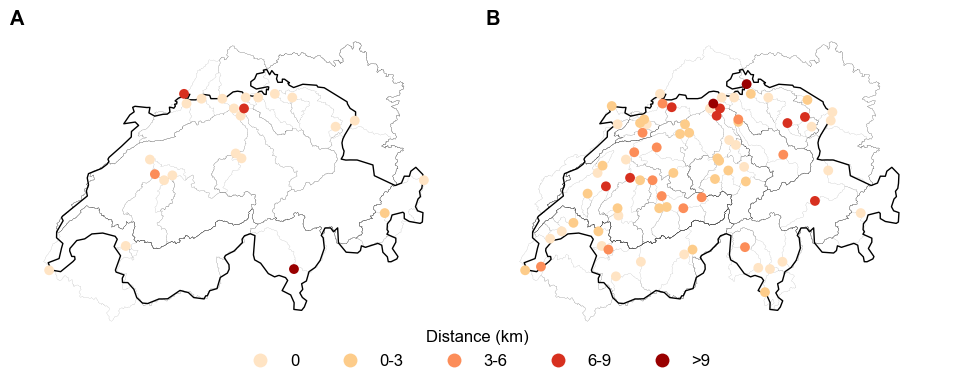

In [86]:
import math 
# List of variables
variable_list = ["foen_nawaf_dist", "foen_nawat_dist"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["NAWA-Fracht", "NAWA-Trend"]
legend_titles = ["A", "B"]
for i, variable in enumerate(variable_list):
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=1)

    if variable == "foen_nawaf_dist":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[network_camels_ch_chem_gdf[~network_camels_ch_chem_gdf.foen_nawaf_dist.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "foen_nawat_dist":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[network_camels_ch_chem_gdf[~network_camels_ch_chem_gdf.foen_nawat_dist.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)


    plot_variable_subplot(axs[i], variable, network_camels_ch_chem_gdf, color_mapping_list, gdf)
    legend_title = legend_titles[i]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='none', linewidth=0.2)
    axs[i].set_xlim(5.5, 11)
    axs[i].set_ylim(45.5, 48.1)
    

# Define your categories and colors
categories = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
labels = ['0', '0-3', '3-6', '6-9', '>9']
colors = ['bisque', '#fdcc8a', '#fc8d59', '#d7301f', '#990000']

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=color, markersize=10, markeredgecolor='none')
    for label, color in zip(labels, colors)
]

fig.legend(handles=legend_elements, title='Distance (km)',
           loc='lower center', bbox_to_anchor=(0.5, 0.195), frameon=False, ncol=len(labels))

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\figs\fig_dist_nawaf_nawat.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

## Ionic mass balance - Nawa-Fracht

In [88]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_chemistry\interval_samples\nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date_end'] = pd.to_datetime(df['date_end'])
    df.set_index('date_end', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))


    # Count the number of non-null values in each column
    Ca = df['Ca'].mean()
    Mg = df['Mg'].mean()
    Na = df['Na'].mean()
    K = df['K'].mean()
    Cl = df['Cl'].mean()
    SO4 = df['SO4'].mean()
    HCO3 = df['alk'].mean()

    
    # Store the results as a tuple (or list)
    data.append([file_number, Ca, Mg, Na, K, Cl, SO4, HCO3])

# Create a new DataFrame to store the counts, with the file number as the index
mean_naduf_daily_df = pd.DataFrame(data, columns=['camels_id', 'Ca', 'Mg', 'Na', 'K', 'Cl', "SO4", "HCO3"]).set_index('camels_id')

mean_naduf_daily_df

100%|██████████| 24/24 [00:10<00:00,  2.25it/s]


,Ca,Mg,Na,K,Cl,SO4,HCO3
camels_id,,,,,,,
2009,41.705955,5.669906,6.835386,1.569579,9.723020,54.432048,1.450499
2016,61.302897,6.936977,6.980511,1.919722,9.842702,25.891693,3.036009
2018,43.842287,4.357602,4.256920,1.360350,4.504234,14.273151,2.273987
2044,66.874641,13.228832,10.939763,2.631370,15.365532,11.769007,4.079238
2067,36.686164,8.722697,1.415595,0.613594,1.152500,52.067829,1.496118
2068,37.743857,6.100203,2.905438,1.963494,3.267387,65.840000,1.030623
2085,56.704644,5.974476,4.521972,1.381426,5.966626,31.728874,2.637166
2091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,87.105166,4.343956,6.971963,2.127775,10.716866,19.618997,4.135448


In [89]:
# Convert mg/L to meq/L (for major cations and anions)
mean_naduf_daily_df['Ca_meq'] = mean_naduf_daily_df['Ca'] / 20.04
mean_naduf_daily_df['Mg_meq'] = mean_naduf_daily_df['Mg'] / 12.1525
mean_naduf_daily_df['Na_meq'] = mean_naduf_daily_df['Na'] / 22.9898
mean_naduf_daily_df['K_meq'] = mean_naduf_daily_df['K'] / 39.0983

mean_naduf_daily_df['Cl_meq'] = mean_naduf_daily_df['Cl'] / 35.453
mean_naduf_daily_df['SO4_meq'] = mean_naduf_daily_df['SO4'] / 48.03


# Important HCO3 conversion correction (assuming original data is mmol/L):
mean_naduf_daily_df['HCO3_mgL'] = mean_naduf_daily_df['HCO3'] * 61.017
mean_naduf_daily_df['HCO3_meq'] = mean_naduf_daily_df['HCO3_mgL'] / 61.017  

# Sum of cations and anions:
mean_naduf_daily_df['sum_cations_meq'] = (
    mean_naduf_daily_df[['Ca_meq', 'Mg_meq', 'Na_meq', 'K_meq']].sum(axis=1)
)

mean_naduf_daily_df['sum_anions_meq'] = (
    mean_naduf_daily_df[['Cl', 'SO4']].div([35.453, 48.03]).sum(axis=1)
    + mean_naduf_daily_df['HCO3_meq']  # Add if you have HCO3
)

# Ionic balance calculation (percentage difference):
mean_naduf_daily_df['ionic_balance_%'] = (
    (mean_naduf_daily_df['sum_cations_meq'] - mean_naduf_daily_df['sum_anions_meq']) /
    (mean_naduf_daily_df['sum_cations_meq'] + mean_naduf_daily_df['sum_anions_meq'])
) * 100



In [122]:
# Define the path where the CSV files are located
path = r"results\Dataset\stream_water_chemistry\interval_samples\nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date_end'] = pd.to_datetime(df['date_end'])
    df.set_index('date_end', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    #df = df.resample('M').apply(lambda x: x.mean(skipna=False))
    df = df[['Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'alk']]

    df_clean = df.dropna(how='any')

    # Convert mg/L to meq/L (for major cations and anions)
    df_clean['Ca_meq'] = df_clean['Ca'] / 20.04
    df_clean['Mg_meq'] = df_clean['Mg'] / 12.1525
    df_clean['Na_meq'] = df_clean['Na'] / 22.9898
    df_clean['K_meq'] = df_clean['K'] / 39.0983

    df_clean['Cl_meq'] = df_clean['Cl'] / 35.453
    df_clean['SO4_meq'] = df_clean['SO4'] / 48.03


    # Important HCO3 conversion correction (assuming original data is mmol/L):
    df_clean['HCO3_mgL'] = df_clean['alk'] * 61.017
    df_clean['HCO3_meq'] = df_clean['HCO3_mgL'] / 61.017  

    # Sum of cations and anions:
    df_clean['sum_cations_meq'] = (
        df_clean[['Ca_meq', 'Mg_meq', 'Na_meq', 'K_meq']].sum(axis=1)
    )

    df_clean['sum_anions_meq'] = (
        df_clean[['Cl', 'SO4']].div([35.453, 48.03]).sum(axis=1)
        + df_clean['HCO3_meq']  # Add if you have HCO3
    )

    # Ionic balance calculation (percentage difference):
    df_clean['ionic_balance'] = (
        (df_clean['sum_cations_meq'] - df_clean['sum_anions_meq']) /
        (df_clean['sum_cations_meq'] + df_clean['sum_anions_meq'])
    ) * 100
    try:
        ib_mean = abs(df_clean.ionic_balance.describe()).T["mean"]
        ib_25 = abs(df_clean.ionic_balance.describe()).T["25%"]
        ib_50 = abs(df_clean.ionic_balance.describe()).T["50%"]
        ib_75 = abs(df_clean.ionic_balance.describe()).T["75%"]

    except:
        ib_mean = np.nan
        ib_25 = np.nan
        ib_50 = np.nan
        ib_75 = np.nan

    # Store the results as a tuple (or list)
    data.append([file_number, ib_mean, ib_25, ib_50, ib_75])

ionic_balance_nawaf = pd.DataFrame(data, columns=['camels_id', "ib_mean", '25', '50', '75']).set_index('camels_id')

100%|██████████| 24/24 [00:00<00:00, 45.81it/s]


In [123]:
ionic_balance_nawaf

,ib_mean,25,50,75
camels_id,,,,
2009,0.435985,0.545902,0.359950,1.299944
2016,1.639680,0.733901,1.594390,2.505173
2018,1.205843,0.271829,1.278908,2.133413
2044,2.099322,1.391718,2.050711,2.778935
2067,0.398352,1.059095,0.216745,1.551320
2068,1.320987,0.111855,1.115087,2.224546
2085,1.191098,0.441571,1.173093,1.783882
2091,NaN,NaN,NaN,NaN
2106,2.179472,1.479517,2.168280,2.797340


In [92]:
df

,Ca,Mg,Na,K,Cl,SO4,alk
date_end,,,,,,,
2019-01-07 10:15:00,60.5501,5.2328,4.4358,1.3673,4.8510,11.3024,3.1750
2019-01-21 10:15:00,61.7357,5.2512,8.5343,1.6797,12.3577,10.9832,3.1408
2019-02-04 10:25:00,70.8429,6.6346,10.2897,1.7182,14.0908,13.7580,3.7023
2019-02-18 10:15:00,67.9467,5.8530,9.2756,1.7552,13.6956,11.6470,3.4946
2019-03-04 09:15:00,60.4641,5.0248,4.5463,1.2511,5.8161,11.2108,3.1318
2019-03-18 10:05:00,48.3943,3.5448,3.1533,0.9531,4.1536,7.1144,2.5093
2019-04-01 11:00:00,58.8316,4.9382,4.2567,1.1550,4.8646,11.1127,3.0847
2019-04-15 10:20:00,54.8497,4.5949,4.2972,1.1573,4.7530,11.0637,2.8801
2019-04-29 10:30:00,46.2330,3.6033,2.9358,0.8475,2.8989,9.7728,2.4249


In [124]:
ionic_balance_nawaf

,ib_mean,25,50,75
camels_id,,,,
2009,0.435985,0.545902,0.359950,1.299944
2016,1.639680,0.733901,1.594390,2.505173
2018,1.205843,0.271829,1.278908,2.133413
2044,2.099322,1.391718,2.050711,2.778935
2067,0.398352,1.059095,0.216745,1.551320
2068,1.320987,0.111855,1.115087,2.224546
2085,1.191098,0.441571,1.173093,1.783882
2091,NaN,NaN,NaN,NaN
2106,2.179472,1.479517,2.168280,2.797340


In [125]:
len(ionic_balance_nawaf[ionic_balance_nawaf["ib_mean"] < 1.5])/23

0.6956521739130435

In [126]:
network_camels_ch_chem_gdf = network_camels_ch_chem.copy()
network_camels_ch_chem_gdf.set_index("gauge_id", inplace=True)
network_camels_ch_chem_gdf[["ib_mean",	"25", "50", "75"]] = ionic_balance_nawaf[["ib_mean",	"25", "50", "75"]]
network_camels_ch_chem_gdf[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]

In [127]:
network_camels_ch_chem_gdf

,sensor_id,nawaf_id,nawat_id,isot_id,chirp_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,...,area_nawat,foen_nawat_dist,q_nawat_corrector,remarks,ib_mean,25,50,75,lat,lon
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,NaN,Porte du Scex,Rhône,557660,133280,6.89,...,5239.402096,0.0,1.000000,NaN,0.435985,0.545902,0.359950,1.299944,46.35,6.89
2011,2011.0,NaN,4070.0,NaN,NaN,Sion,Rhône,593770,118630,7.36,...,3372.417040,0.0,1.000005,NaN,NaN,NaN,NaN,NaN,46.22,7.36
2016,2016.0,1833.0,1833.0,NIO02,NaN,Brugg,Aare,657000,259360,8.19,...,11681.282882,0.0,0.999999,NaN,1.639680,0.733901,1.594390,2.505173,47.48,8.19
2018,2018.0,1835.0,1339.0,NaN,NaN,Mellingen,Reuss,662830,252580,8.27,...,3420.503458,10.0,1.010250,NaN,1.205843,0.271829,1.278908,2.133413,47.42,8.27
2019,2019.0,NaN,1852.0,NIO01,NaN,Brienzwiler,Aare,649930,177380,8.09,...,555.808970,3.3,1.001097,NaN,NaN,NaN,NaN,NaN,46.75,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.63,10.45
2623,2623.0,NaN,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.53,8.35
2634,2634.0,6169.0,1181.0,NaN,NaN,Emmen,Kleine Emme,663700,213630,8.28,...,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...,0.909065,0.389850,0.941559,1.324744,47.07,8.28


In [128]:
df

,Ca,Mg,Na,K,Cl,SO4,alk
date_end,,,,,,,
2019-01-07 10:15:00,60.5501,5.2328,4.4358,1.3673,4.8510,11.3024,3.1750
2019-01-21 10:15:00,61.7357,5.2512,8.5343,1.6797,12.3577,10.9832,3.1408
2019-02-04 10:25:00,70.8429,6.6346,10.2897,1.7182,14.0908,13.7580,3.7023
2019-02-18 10:15:00,67.9467,5.8530,9.2756,1.7552,13.6956,11.6470,3.4946
2019-03-04 09:15:00,60.4641,5.0248,4.5463,1.2511,5.8161,11.2108,3.1318
2019-03-18 10:05:00,48.3943,3.5448,3.1533,0.9531,4.1536,7.1144,2.5093
2019-04-01 11:00:00,58.8316,4.9382,4.2567,1.1550,4.8646,11.1127,3.0847
2019-04-15 10:20:00,54.8497,4.5949,4.2972,1.1573,4.7530,11.0637,2.8801
2019-04-29 10:30:00,46.2330,3.6033,2.9358,0.8475,2.8989,9.7728,2.4249


In [99]:
CAMELS_CH_Chem_catchments = CAMELS_CH_Chem_catchments.to_crs("EPSG:4326")

In [100]:
countries = countries.to_crs("EPSG:4326")

In [101]:
CAMELS_CH_Chem_catchments_nawaf= CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[network_camels_ch_chem_gdf[~network_camels_ch_chem_gdf["50"].isna()].index]

In [102]:
CAMELS_CH_Chem_catchments_nawaf

,sensor_id,nawaf_id,nawat_id,isot_id,chirp_id,gauge_name,water_body,gauge_east,gauge_nort,gauge_lon,gauge_lat,area,area_swiss,geometry
gauge_id,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,NaN,Porte du Scex,Rhône,557660,133280,6.89,46.35,5239.4,99.994914,"POLYGON Z ((8.40869 46.65398 0.00000, 8.40983 ..."
2016,2016.0,1833.0,1833.0,NIO02,NaN,Brugg,Aare,657000,259360,8.19,47.48,11681.3,100.000000,"POLYGON Z ((8.18125 47.48564 0.00000, 8.18135 ..."
2018,2018.0,1835.0,1339.0,None,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,3385.8,100.000000,"POLYGON Z ((8.28316 47.42399 0.00000, 8.28409 ..."
2044,2044.0,1823.0,1044.0,None,NaN,Andelfingen,Thur,693510,272500,8.68,47.60,1701.6,100.000000,"POLYGON Z ((9.02856 47.65310 0.00000, 9.02858 ..."
2067,2067.0,1842.0,NaN,None,NaN,Martina,Inn,830640,197190,10.47,46.89,1937.5,97.366928,"POLYGON Z ((10.31364 46.92516 0.00000, 10.3139..."
2068,2068.0,1840.0,1840.0,NIO05,NaN,Riazzino,Ticino,713670,113500,8.91,46.16,1613.3,77.053281,"POLYGON Z ((8.96069 46.61845 0.00000, 8.96056 ..."
2085,2085.0,1832.0,1832.0,None,NaN,Hagneck,Aare,580680,211650,7.18,47.06,5111.9,100.000000,"POLYGON Z ((7.24688 47.06459 0.00000, 7.24685 ..."
2106,2106.0,1828.0,2885.0,None,NaN,"Münchenstein, Hofmatt",Birs,613570,263080,7.62,47.52,887.3,100.000000,"POLYGON Z ((7.61628 47.52337 0.00000, 7.61653 ..."
2112,2112.0,4409.0,4409.0,None,2112.0,Appenzell,Sitter,749040,244220,9.41,47.33,74.4,100.000000,"POLYGON Z ((9.46187 47.34317 0.00000, 9.46172 ..."


,sensor_id,nawaf_id,nawat_id,isot_id,chirp_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,...,area_nawat,foen_nawat_dist,q_nawat_corrector,remarks,ib_mean,25,50,75,lat,lon
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,NaN,Porte du Scex,Rhône,557660,133280,6.89,...,5239.402096,0.0,1.000000,NaN,0.435985,-0.545902,0.359950,1.299944,46.35,6.89
2011,2011.0,NaN,4070.0,NaN,NaN,Sion,Rhône,593770,118630,7.36,...,3372.417040,0.0,1.000005,NaN,NaN,NaN,NaN,NaN,46.22,7.36
2016,2016.0,1833.0,1833.0,NIO02,NaN,Brugg,Aare,657000,259360,8.19,...,11681.282882,0.0,0.999999,NaN,1.639680,0.733901,1.594390,2.505173,47.48,8.19
2018,2018.0,1835.0,1339.0,NaN,NaN,Mellingen,Reuss,662830,252580,8.27,...,3420.503458,10.0,1.010250,NaN,1.205843,0.271829,1.278908,2.133413,47.42,8.27
2019,2019.0,NaN,1852.0,NIO01,NaN,Brienzwiler,Aare,649930,177380,8.09,...,555.808970,3.3,1.001097,NaN,NaN,NaN,NaN,NaN,46.75,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.63,10.45
2623,2623.0,NaN,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.53,8.35
2634,2634.0,6169.0,1181.0,NaN,NaN,Emmen,Kleine Emme,663700,213630,8.28,...,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...,0.909065,0.389850,0.941559,1.324744,47.07,8.28


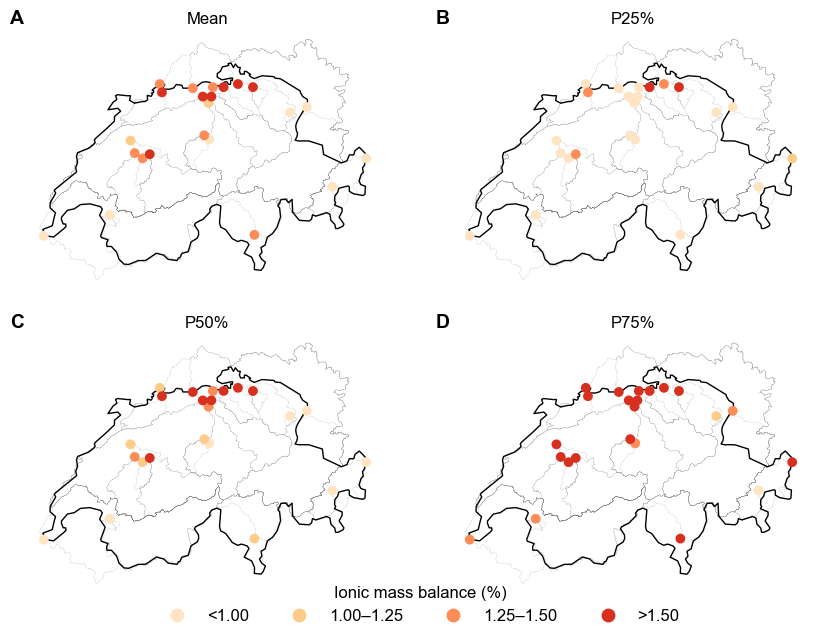

In [141]:
import math 
# List of variables
variable_list = ["ib_mean",	"25", "50", "75"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows})
text_subplots = ["ionic_balance"]
legend_titles = ["A"]
axs = axs.flatten()
for i, variable in enumerate(variable_list):

    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=1)

    CAMELS_CH_Chem_catchments_nawaf.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)



    plot_variable_subplot(axs[i], variable, network_camels_ch_chem_gdf, color_mapping_list, gdf)
    #legend_title = legend_titles[i]
        
    #axs.set_title('Ionic balance [%]', loc="left", fontweight="normal", fontsize="10")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='none', linewidth=0.2)
    #countries.plot(ax=axs, facecolor='none', edgecolor='black', linewidth=0.2)

    axs[i].set_xlim(5.5, 11)
    axs[i].set_ylim(45.5, 48.1)
    
    #river_ch.plot(ax=axs[i], linewidth=0.1)

# Define your categories and colors
categories = [(-np.inf, 0.75), (0.75, 1.5), (1.5, 2.25), (2.25, 3.0), (3.0, np.inf)]
labels = ['<1.00', '1.00–1.25', '1.25–1.50', '>1.50']
colors = ['bisque', '#fdcc8a', '#fc8d59', '#d7301f', '#990000']

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=color, markersize=10, markeredgecolor='none')
    for label, color in zip(labels, colors)
]


fig.legend(handles=legend_elements, title='Ionic mass balance (%)',
           loc='lower center', bbox_to_anchor=(0.5, -0.02), frameon=False, ncol=len(labels))


axs[0].set_title('A', loc="left", fontweight="bold", fontsize="14")
axs[0].set_title('Mean', loc="center", fontweight="normal", fontsize="12")

axs[1].set_title('B', loc="left", fontweight="bold", fontsize="14")
axs[1].set_title('P25%', loc="center", fontweight="normal", fontsize="12")

axs[2].set_title('C', loc="left", fontweight="bold", fontsize="14")
axs[2].set_title('P50%', loc="center", fontweight="normal", fontsize="12")

axs[3].set_title('D', loc="left", fontweight="bold", fontsize="14")
axs[3].set_title('P75%', loc="center", fontweight="normal", fontsize="12")


# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\figs\fig_ionicbalance.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

# End